<a href="https://colab.research.google.com/github/eliasarasua/TFM/blob/main/Elia_Saras%C3%BAa_Zubimendi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minería de datos de ámbito Educativo

Análisis de datos y/o predicción mediante técnicas estadísticas de inferencia tipo Machine Learning.

Realizado por Elia Sarasúa Zubimendi.

## Pre-procesado de datos


Carga de librerías:

In [ ]:
#librerías para cargar los datos
import pandas as pd
import io
from google.colab import files

In [ ]:
# librerías para manipulación y visualización
import matplotlib.pyplot as plt
from numpy import corrcoef, transpose, arange
import itertools
import seaborn as sns


Carga de datos:

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
datos = upload_files()
datos.head()

Saving student-por.csv to student-por.csv
User uploaded file "student-por.csv" with length 93220 bytes


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


### Exploración de los datos

In [ ]:
datos.shape

(649, 33)

En la pequeña muestra de datos mostrada en la ventana de código anterior, se puede observar que por cada alumno se tienen 33 atributos. Además, se tienen datos de 649 alumnos distintos. 

A continuación, se va a estudiar cuáles son estos y qué tipo de información contiene cada uno.


In [ ]:
indices = datos.columns
indices

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### Análisis de atributos

In [ ]:
#Atributo school:
datos['school'].value_counts()

GP    423
MS    226
Name: school, dtype: int64

In [ ]:
#Atributo sex:
datos['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

In [ ]:
#Atributo age:
sexo = datos['age'].value_counts()
maximo = datos['age'].max()
min = datos['age'].min()

print(f'Valores: \n{sexo}, \nValor máximo: {maximo} \nValor mínimo: {min}')

Valores: 
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64, 
Valor máximo: 22 
Valor mínimo: 15


In [ ]:
#Atributo address:
datos['address'].value_counts()

U    452
R    197
Name: address, dtype: int64

In [ ]:
#Atributo famsize: 
datos['famsize'].value_counts()

GT3    457
LE3    192
Name: famsize, dtype: int64

In [ ]:
#Atributo Pstatus: 
datos['Pstatus'].value_counts()

T    569
A     80
Name: Pstatus, dtype: int64

In [ ]:
#Atributo Medu:
nivel = datos['Medu'].value_counts()
maximo = datos['Medu'].max()
min = datos['Medu'].min()

print(f'Valores: \n{nivel}, \nValor máximo: {maximo} \nValor mínimo: {min}')

Valores: 
2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64, 
Valor máximo: 4 
Valor mínimo: 0


In [ ]:
#Atributo Fedu:
nivel = datos['Fedu'].value_counts()
maximo = datos['Fedu'].max()
min = datos['Fedu'].min()

print(f'Valores: \n{nivel}, \nValor máximo: {maximo} \nValor mínimo: {min}')

Valores: 
2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64, 
Valor máximo: 4 
Valor mínimo: 0


In [ ]:
#Atributo Mjob:
datos['Mjob'].value_counts()

other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

In [ ]:
#Atributo Fjob:
datos['Fjob'].value_counts()

other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64

In [ ]:
#Atributo reason:
datos['reason'].value_counts()

course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64

In [ ]:
#Atributo guardian:
datos['guardian'].value_counts()

mother    455
father    153
other      41
Name: guardian, dtype: int64

In [ ]:
#Atributo traveltime:
datos['traveltime'].value_counts()

1    366
2    213
3     54
4     16
Name: traveltime, dtype: int64

In [ ]:
#Atributo studytime:
datos['studytime'].value_counts()

2    305
1    212
3     97
4     35
Name: studytime, dtype: int64

In [ ]:
#Atributo failures:
datos['failures'].value_counts()

0    549
1     70
2     16
3     14
Name: failures, dtype: int64

In [ ]:
#Atributo schoolsup:
datos['schoolsup'].value_counts()

no     581
yes     68
Name: schoolsup, dtype: int64

In [ ]:
#Atributo famsup:
datos['famsup'].value_counts()

yes    398
no     251
Name: famsup, dtype: int64

In [ ]:
#Atributo paid:
datos['paid'].value_counts()

no     610
yes     39
Name: paid, dtype: int64

In [ ]:
#Atributo activities:
datos['activities'].value_counts()

no     334
yes    315
Name: activities, dtype: int64

In [ ]:
#Atributo nursery:
datos['nursery'].value_counts()

yes    521
no     128
Name: nursery, dtype: int64

In [ ]:
#Atributo higher:
datos['higher'].value_counts()

yes    580
no      69
Name: higher, dtype: int64

In [ ]:
#Atributo internet:
datos['internet'].value_counts()

yes    498
no     151
Name: internet, dtype: int64

In [ ]:
#Atributo romantic:
datos['romantic'].value_counts()

no     410
yes    239
Name: romantic, dtype: int64

In [ ]:
#Atributo famrel:
datos['famrel'].value_counts()

4    317
5    180
3    101
2     29
1     22
Name: famrel, dtype: int64

In [ ]:
#Atributo freetime:
datos['freetime'].value_counts()

3    251
4    178
2    107
5     68
1     45
Name: freetime, dtype: int64

In [ ]:
#Atributo goout:
datos['goout'].value_counts()

3    205
2    145
4    141
5    110
1     48
Name: goout, dtype: int64

In [ ]:
#Atributo Dalc:
datos['Dalc'].value_counts()

1    451
2    121
3     43
5     17
4     17
Name: Dalc, dtype: int64

In [ ]:
#Atributo Walc:
datos['Walc'].value_counts()

1    247
2    150
3    120
4     87
5     45
Name: Walc, dtype: int64

In [ ]:
#Atributo health:
datos['health'].value_counts()

5    249
3    124
4    108
1     90
2     78
Name: health, dtype: int64

In [ ]:
#Atributo absences:
valores = datos['absences'].value_counts()
maximo = datos['absences'].max()
min = datos['absences'].min()

print(f'Valores: \n{valores}, \nValor máximo: {maximo} \nValor mínimo: {min}')

Valores: 
0     244
2     110
4      93
6      49
8      42
10     21
1      12
5      12
12     12
16     10
14      8
3       7
9       7
11      5
7       3
18      3
15      2
21      2
22      2
30      1
13      1
24      1
26      1
32      1
Name: absences, dtype: int64, 
Valor máximo: 32 
Valor mínimo: 0


In [ ]:
#Atributo G1, G2 y G3
mediaG1 = datos['G1'].mean()
mediaG2 = datos['G2'].mean()
mediaG3 = datos['G3'].mean()
print(f'Calificación media del primer trimestre: {mediaG1}. \nCalificación media del segundo trimestre: {mediaG2}. \nCalificación media final: {mediaG3}')

Calificación media del primer trimestre: 11.399075500770415. 
Calificación media del segundo trimestre: 11.570107858243452. 
Calificación media final: 11.906009244992296


**Atributos:**


*   *school*: Variable binaria. Escuela a la que van los alumnos (GP: Gabriel Pereira ó MS: Mousinho da Silveira)
*   *sex*: Variable binaria. Género de los alumnos (F: Female ó M: Male)
*   *age*: Variable numérica. Años de los alumnos (Mínimo: 15 y máximo: 22)
*   *address*: Variable binaria. Dirección de residencia de los alumnos (U: Urban ó R: rural)
*   *famsize*: Variable binaria. Cantidad de miembros en la unidad familiar (LE3: Less or equal to 3 ó GTE: Greater than 3)
*   *Pstatus*: Variable binaria. Situación de los padres (T: together ó A: apart)
*   *Medu*: Variable numérica. Nivel educativo de la madre (0: ninguna, 1: educación primaria, 2: 5th to 9th, 3: educación secundaria ó 4: grado superior)
*   *Fedu*: Variable numérica. Nivel educativo del padre (0: ninguna, 1: educación primaria, 2: 5th to 9th, 3: educación secundaria ó 4: grado superior)
*   *Mjob*: Variable nominal. Trabajo de la madre (other, services (funcionaria), at_home, teacher, health)
*   *Fjob*: Variable nominal. Trabajo del padre (other, services (funcionario), at_home, teacher, health)
*   *reason*: Variable nominal. Razón por la cual se selecciona la escuela (course, home (cerca de casa), reputation, other)
*  *guardian*: Variable nominal. Tutor del alumno (mother, father o other)
*   *traveltime*: Variable numérica. Tiempo de trayecto entre la casa y la escuela (1: menos de 15 min, 2: entre 15 y 30 min, 3: entre 30 min y 1 h ó 4: más de 1 h)
*   *studytime*: Variable numérica. Tiempo de estudio semanal (1: menos de 2 h, 2: entre 2 y 5 h, 3: entre 5 y 10 h ó 4: más de 10 h)
*   *failures*: Variable numérica. Númeor de suspensos de asignaturas anteriores (x si x entre 1 y 3, ó 4 si es superior)
*   *schoolsup*: Variable binaria. Apoyo educativo adicional (Yes/No)
*   *famsup*: Variable binaria. Apoyo educativo familiar (Yes/No)
*   *paid*: Variable Binaria. Clases extras pagadas dentro de la asignatura del curso: Math or Portuguese (Yes/No)
*   *activities*: Variable binaria. Actividades extracurriculares (Yes/No)
*   *nursery*: Variable binaria. Atendido en la enfermería de la escuela (Yes/No)
*   *higher*: Variable binaria. Quiere realizar una educación superior (Yes/No)
*   *internet*: Variable binaria. Tiene acceso a internet en casa (Yes/No)
*   *romantic*: Variable binaria. Tiene una relación sentimental (Yes/No)
*   *famrel*: Variable numérica. Calidad de las relaciones familiares (de 1-muy mala a 5-excelente)
*   *freetime*: Variable numérica. Frecuencia con la que tiene tiempo libre después de la escuela (de 1-muy baja a 5-muy alta)
*   *goout*: Variable numérica. Frecuencia con la que sale con amigos (de 1-muy baja a 5-muy alta)
*   *Dalc*: Variable numérica. Frecuencia con la que consume alcohol entre semana (de 1-muy baja a 5-muy alta)
*   *Walc*: Variable numérica. Frecuencia con la que consume alcohol en fin de semana (de 1-muy baja a 5-muy alta)
*   *health*: Variable numérica. Estado de salud actual (de 1-muy malo a 5-muy bueno)
*   *absences*: Variable numérica. Faltas de asistencia a la escuela (de 0 a 93 (no hay alumnos que hayan faltado más de 32 días)
*   **G1**: Variable numérica. Calificación primer trimestre (de 0 a 20)
*   **G2**: Variable numérica. Calificación segundo trimestre (de 0 a 20)
*   **G3**: Variable numérica. Calificación final (de 0 a 20)
























En la siguiente ventana de código, se tiene una descripción detallada de los atributos. 

In [ ]:
datos.describe(include="all")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649,649,649.000000,649,649,649,649.000000,649.000000,649,649,649,649,649.000000,649.000000,649.000000,649,649,649,649,649,649,649,649,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,no,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,423,383,NaN,452,457,569,NaN,NaN,258,367,285,455,NaN,NaN,NaN,581,398,610,334,521,580,498,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.744222,NaN,NaN,NaN,2.514638,2.306626,NaN,NaN,NaN,NaN,1.568567,1.930663,0.221880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,NaN,NaN,1.218138,NaN,NaN,NaN,1.134552,1.099931,NaN,NaN,NaN,NaN,0.748660,0.829510,0.593235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


Del mismo modo, para poder tener una idea más detallada de cada variable, se han obtenido los histogramas de las variables numéricas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf50bdaf50>,
      dtype=object)

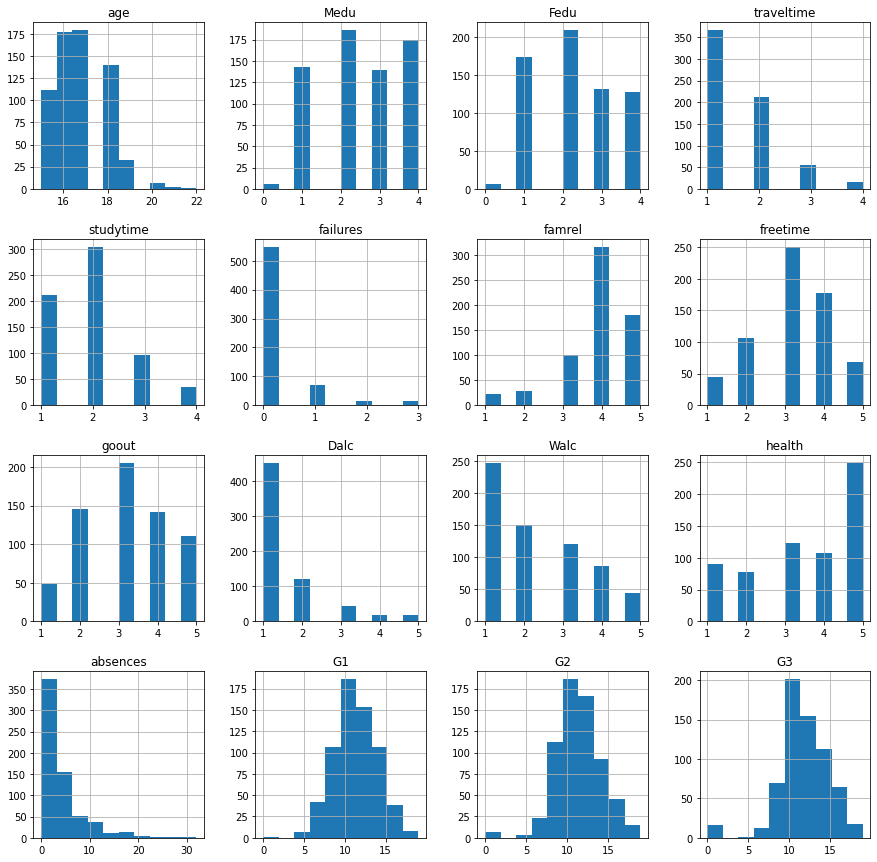

In [ ]:
datos.hist(figsize=(15,15))

#### Tratamiento de outliers


Tras haber analizado cada atributo, es importante comprobar si exsiten valores nulos. 

In [ ]:
datos.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

En este caso, no existen valores nulos, lo cual facilita el pre-procesado de los datos.

### Selección de variables características

Debido a que los atributo **G1**, **G2** y **G3** son las notas de los dos primeros trimestres y la nota final, no se incluirán como características. Puesto que la variable de salida será **G3**.

La muestra de datos es bastante pequeña, 649 alumnos, y para entrenar el modelo se debe dividir en dos conjuntos de datos, entrenamiento y test. 

Para realizar esta división, en principio se trato de utilizar la validación cruzada *KFold*, pero la muestra que se obtuvo para entrenamiento y para test no era representativa. Esto quiere decir que, la proporción de alumnos que van a una escuela o a otra no coincidía con la proporción real. Por ejemplo, el subconjunto de test que se generó estaba compuesto unicamente por alumnos de la escuela MS. 

Para solventar este fallo, se ha utilizado la validación cruzada **StratifiedKFold**. Mediante este tipo de validación las divisiones que se generan conservan el porcentaje de muestras de cada clase. La variable según la cuál se ha determinado la distribución de clases es *school*.

In [ ]:
datos["school"].value_counts()/len(datos)

GP    0.651772
MS    0.348228
Name: school, dtype: float64

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=20, shuffle= False)
for resto_index, validation_index in cv.split(datos, datos["school"]):
    resto = datos.loc[resto_index]
    validation = datos.loc[validation_index]


for train_index, test_index in cv.split(resto, resto["school"]):
    train = datos.loc[train_index]
    test = datos.loc[test_index]

In [ ]:
print(f'Porcentaje de muestras de cada colegio en el conjunto de datos de validación: \n{validation["school"].value_counts()/len(validation)}\n')
print(f'Porcentaje de muestras de cada colegio en el conjunto de datos de train: \n{train["school"].value_counts()/len(train)}\n')
print(f'Porcentaje de muestras de cada colegio en el conjunto de datos de test: \n{test["school"].value_counts()/len(test)}\n')

Porcentaje de muestras de cada colegio en el conjunto de datos de validación: 
GP    0.65625
MS    0.34375
Name: school, dtype: float64

Porcentaje de muestras de cada colegio en el conjunto de datos de train: 
GP    0.686542
MS    0.313458
Name: school, dtype: float64

Porcentaje de muestras de cada colegio en el conjunto de datos de test: 
GP    0.666667
MS    0.333333
Name: school, dtype: float64



In [ ]:
print(f'Tamaño del conjunto de datos de entrenamiento (train): {train.shape}\n')
print(f'Tamaño del conjunto de datos de test: {test.shape}\n')
print(f'Tamaño del conjunto de datos de validación (validation): {validation.shape}\n')

Tamaño del conjunto de datos de entrenamiento (train): (587, 33)

Tamaño del conjunto de datos de test: (30, 33)

Tamaño del conjunto de datos de validación (validation): (32, 33)



De este modo, tenemos tres subconjuntos, train, test y validation, con porcentajes de muestras de cada clase idénticos. 

**Matriz de correlación**: 

Para seleccionar las variables más características, se muestra la matriz de correlación con todas las variables numéricas. 

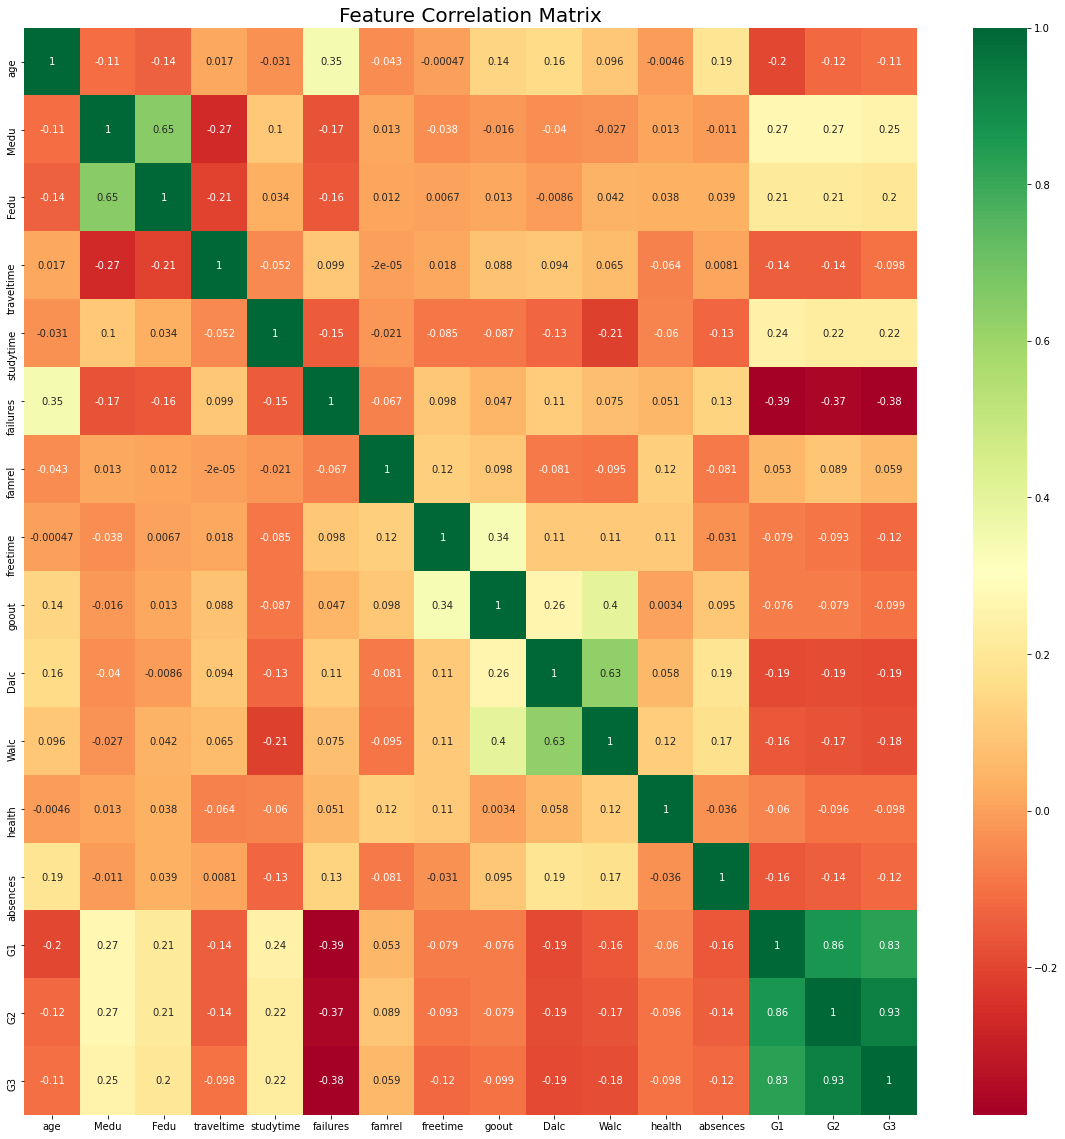

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn')
plt.title("Feature Correlation Matrix",fontsize=20)
plt.show()

En este caso, las variables G1,G2,G3 tienen una alta dependencia, esto se debe a que, por lo general, un alumno con ciertas características seguirá un progreso similar en sus notas.

La nota final, **G3**, tiene una dependencia moderada (entre 0.20 y 0.50 aproximadamente) con las variables: failures, Medu, Fedu y studytime.

Pero existen variables características que no se están teniendo en cuenta porque no son numéricas. Para solucionar este problema, se debe realizar una transformación de los datos y codificar las variables que no son numéricas, es decir, binarias y nominales. 

Para lograr esta codificación se ha utilizado la libería *scikit-learn*. En concreto, se utilizan las clases *ColumnTransformer* y *OrdinalEncoder*, pertenecientes a los módulos *sklearn.compose* y *sklearn.preprocessing* respectivamente.


*ColumnTransformer* es un estimador que se utiliza para aplicar transformadores a columnos de una matriz o un dataframe. 

Este estimador está compuesto por dos parámetros: 
*   **Transformador**: conjunto de tuplas
    *   Nombre
    *   Transformador
    *   Columnas
*   **Resto**: que se realiza con el resto de columnas a las que no se aplica el transformador

*OrdinalEncoder* es un transformador que codifica características categóricas como una matriz de números enteros con valores enteros que van desde el 0 hasta n_categorías-1. 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

no_numericas = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher',
                'internet','romantic']
numericas = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime','failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
preproceso = ColumnTransformer([('scale', OrdinalEncoder(), no_numericas)],remainder='passthrough')

In [ ]:
train_prep = preproceso.fit_transform(train)
test_prep = preproceso.transform(test)
validation_prep = preproceso.transform(validation)
datos_prep = preproceso.transform(datos)

train_prep = pd.DataFrame(train_prep, columns=(no_numericas + numericas))
test_prep = pd.DataFrame(test_prep, columns=(no_numericas + numericas))
validation_prep = pd.DataFrame(validation_prep, columns=(no_numericas + numericas))
datos_prep = pd.DataFrame(datos_prep, columns=(no_numericas + numericas))


A continuación, se muestran los datos tras realizarse la transformación. 

In [ ]:
train_prep

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,0.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,15.0,1.0,1.0,1.0,2.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,0.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,1.0,0.0,1.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,18.0,2.0,2.0,2.0,3.0,0.0,5.0,4.0,5.0,1.0,4.0,3.0,0.0,11.0,12.0,13.0
583,1.0,0.0,0.0,1.0,0.0,4.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,18.0,4.0,2.0,1.0,2.0,0.0,5.0,3.0,1.0,1.0,1.0,5.0,0.0,5.0,0.0,0.0
584,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.0,1.0,1.0,3.0,2.0,1.0,4.0,4.0,2.0,1.0,2.0,2.0,2.0,9.0,10.0,10.0
585,1.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19.0,1.0,1.0,2.0,1.0,1.0,5.0,5.0,5.0,2.0,3.0,2.0,0.0,5.0,0.0,0.0


En la siguiente ventana de código, se vuelve a obtener la matriz de correlación, en este caso de todos los atributos disponibles.

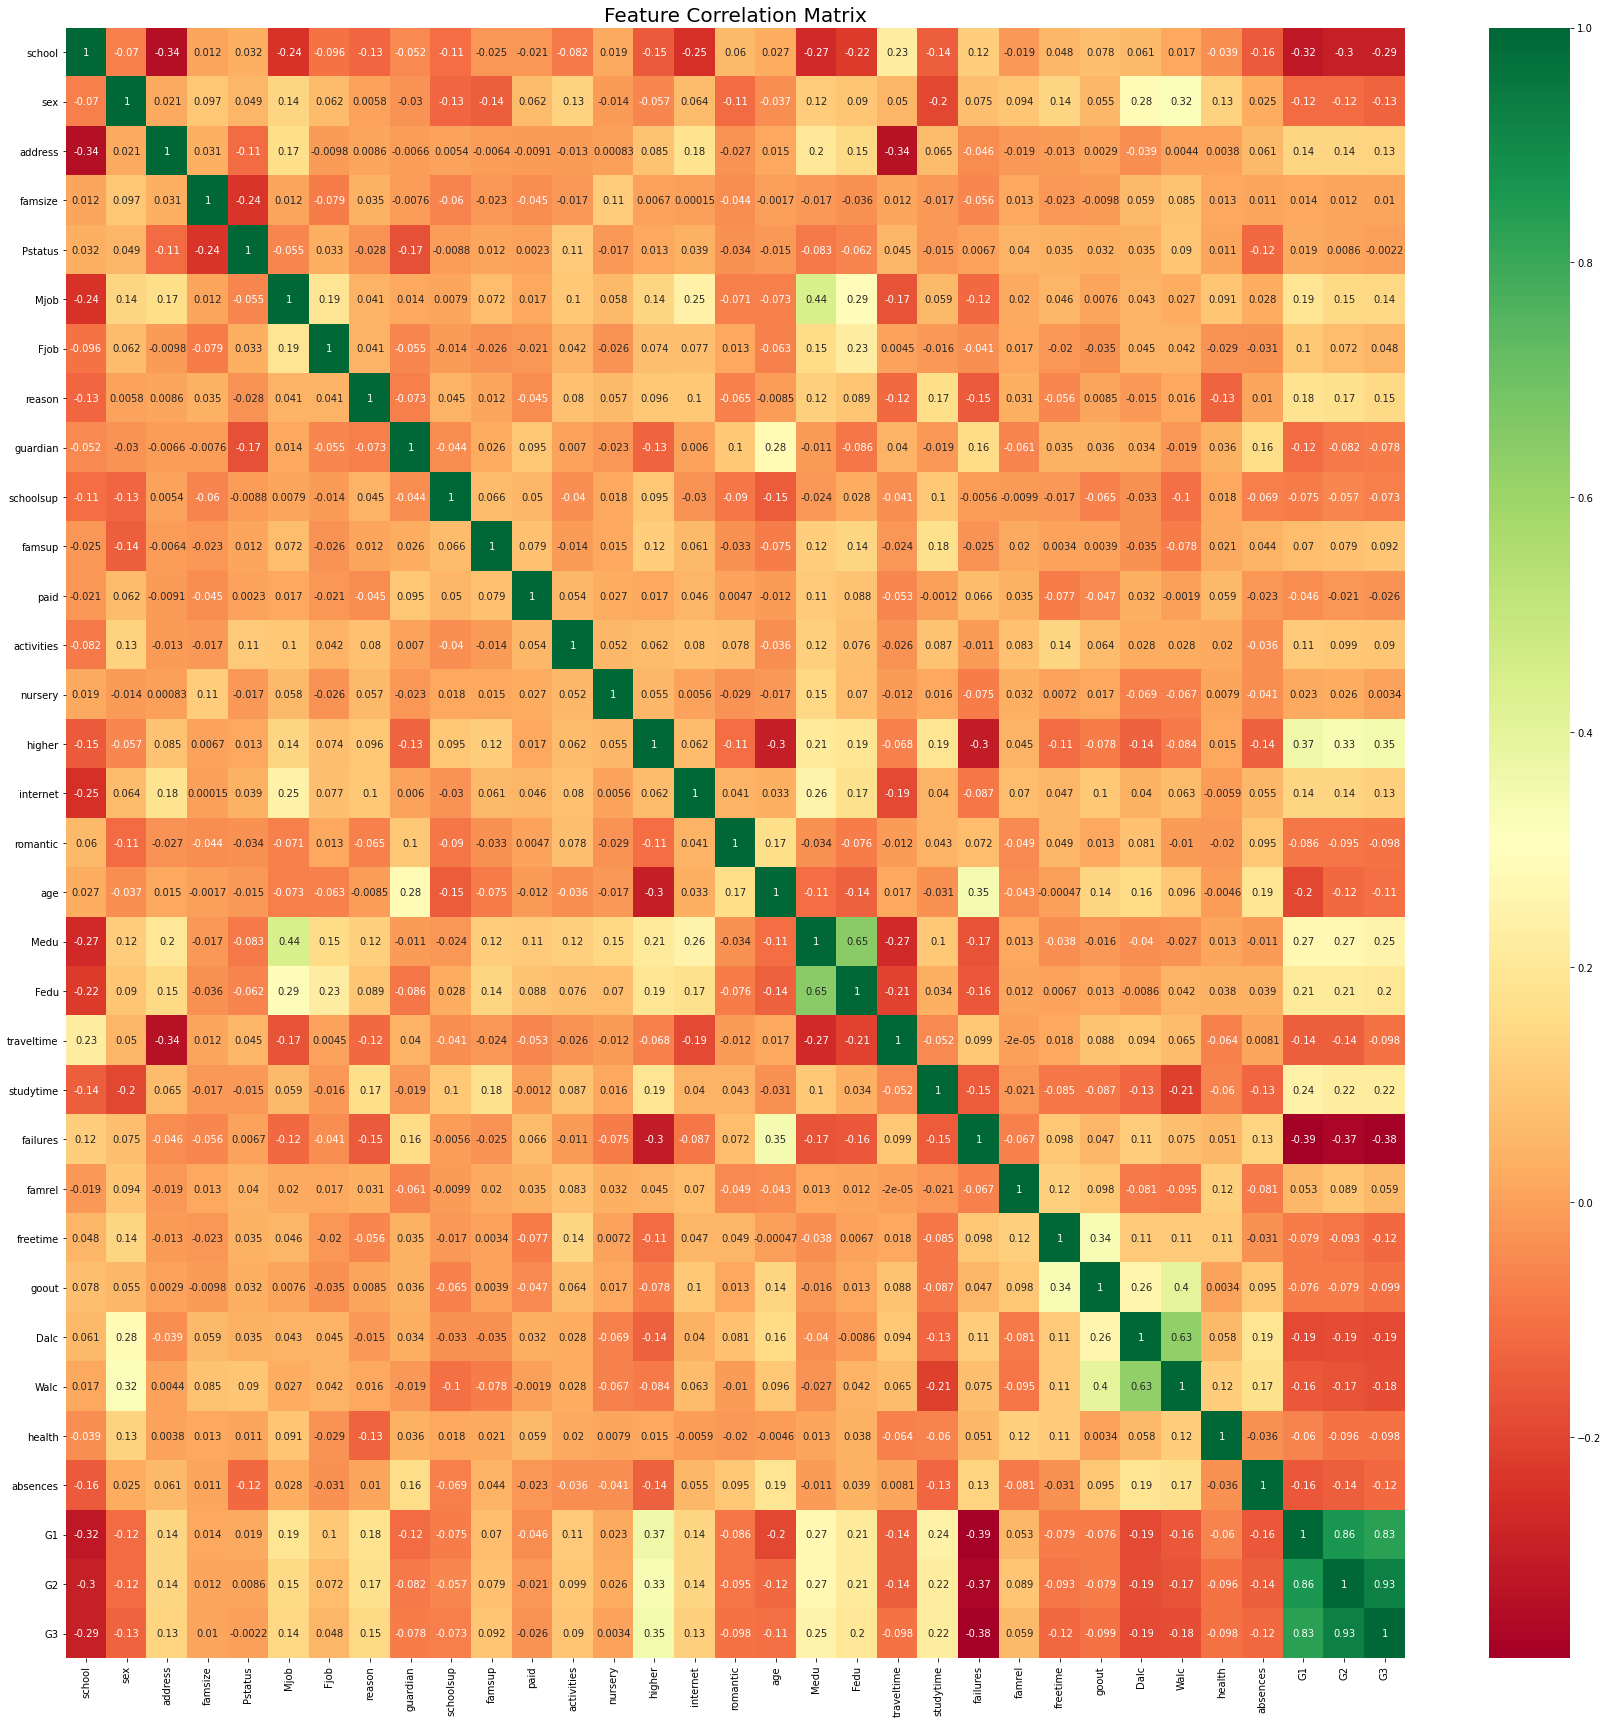

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(train_prep.corr(), annot=True, cmap='RdYlGn')
plt.title("Feature Correlation Matrix",fontsize=20)
plt.show()

Las variables con mayor valor, ya sea positivo o negativo, que están más correlacionadas y son las que más afectan a la nota final del alumnos son: *failures*, *Medu*, *Fedu*, *studytime*, *school* y *higher*

In [ ]:
selected_features = ['failures','Medu', 'Fedu','studytime','school','higher','G3']


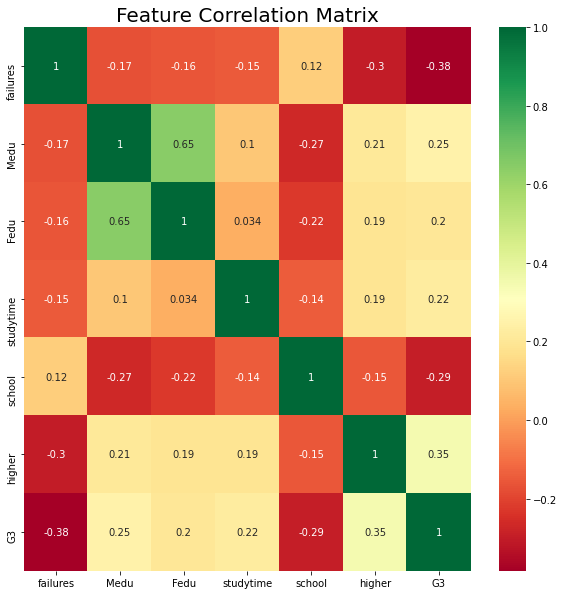

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train_prep[selected_features].corr(), annot=True, cmap='RdYlGn')
plt.title("Feature Correlation Matrix",fontsize=20)
plt.show()

## Predicción Nota Final Alumnos


Para predecir la nota de los alumnos se van a probar distintos modelos de regresión y se determinará cuál obtiene un mejor resultado.

Posteriormente, se optimizaán los parámetros del modelo con mejor MAE y se obtendrá la predicción final para el conjunto de test. 

### Evaluación de modelos

#### RandomForest

##### Parametrización

Para realizar la predicción se utiliza el modelo **RandomForests**. 

Del mismo modo que se ha hecho en el preprocesado, para dividir el conjunto de datos en train y test, se vuelve a utilizar la validación cruzada *StratifiedKFold*, para que el resultado sea óptimo. 

El modelo **RandomForests** combina la técnica de *bagging* que trata de replicar el dataset muestreando los datos del dataset original mediante la técnica de reemplazo. De este modo, se mantiene el mismo tamaño. Además, este modelo, realiza el reemplazo con distintas características en cada uno de los árboles que se contruyen. 

Para valorar el resultado obtenido, se utiliza la métrica **RMSE**. 




En primer lugar, se va a obtener el número de estimadores óptimo, es decir, el número de árboles de decisión que se deben utilizar. 

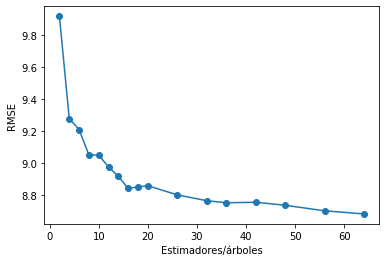

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error

l_estimators = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 26, 32, 36, 42, 48, 56, 64]

scores = []
for estimators in l_estimators:
   fold_accuracy = []
   regressor =  RandomForestRegressor(n_estimators= estimators, 
                  criterion='mse', random_state=0)
   for train_fold, test_fold in cv.split(train_prep, train_prep["school"]): 
      # Se divide el conjunto de train en: f_train y f_test
      f_train = train_prep[selected_features].loc[train_fold]
      f_test = train_prep[selected_features].loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['G3'], axis=1), 
                           y = f_train['G3'])
      y_pred = regressor.predict(X = f_test.drop(['G3'], axis = 1))
      # evaluación del modelo
      rmse = mean_squared_error(f_test['G3'], y_pred)
      fold_accuracy.append(rmse)
   scores.append(sum(fold_accuracy)/len(fold_accuracy))

plt.plot(l_estimators, scores, marker = 'o')
plt.ylabel('RMSE')
plt.xlabel('Estimadores/árboles')
plt.show()


In [ ]:
best_est = l_estimators[np.argmin(scores)]
best_rmse = np.min(scores)
print ("Valor mínimo (Estimadores = %i, RMSE = %6.2f)"  % (best_est, best_rmse))


Valor mínimo (Estimadores = 64, RMSE =   8.68)


Mediante la figura anterior se ve como el númeor de estimadores óptimo es: **64**. Este valor es el más óptimo porque es el que tiene menor RMSE: **8.68**.

Pero, se van a utilizar **36** árboles puesto que 64 serían demasiados y el error que se mejora no es significante. 


##### Construcción y evaluación del modelo RandomForests



Para construir el modelo, se utiliza como número de estimadores la variable *best_est* que es la obtenida en la parametrización. 

Antes de continuar, se obtienen las variables *train_features*, *test_features* y *validation_features* las cuales únicamente contienen los valores de los atributos seleccionados como variables características. 

El primer paso es ajustar el modelo al conjunto de datos de entrenamiento, lo cual se hace mediante la clase **fit**. 

Posteriormente, se utiliza el conjunto de validación para evaluar cuál es el modelo que predice mejor la variable *final*. Esto se realiza mediante la clase **predict**. 

In [ ]:
#obtener variables del conjunto de variables más características 
train_features = train_prep[selected_features]
test_features = test_prep[selected_features]
validation_features = validation_prep[selected_features]
datos_features = datos_prep[selected_features]

In [ ]:
#modelo RandomForest
regressor_RF =  RandomForestRegressor(n_estimators= 36, criterion='mse', random_state=0)
regressor_RF

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=36, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#ajuste del modelo
regressor_RF.fit( X = train_features.drop(['G3'], axis=1), y = train_features['G3']) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=36, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#evaluación del modelo mediante el conjunto de datos de validación
y_pred = regressor_RF.predict(validation_features.drop(['G3'],axis=1)) 

La variable *y_pred* contiene las notas finales predichas para el conjunto de datos de validación. 

In [ ]:
rmse = mean_squared_error(validation['G3'], y_pred) 
print ('RMSE', rmse)

RMSE 10.240968447342814


En este caso, el RMSE obtenido es: **10.24**

#### DecisionTree 

Un árbol de decisión se realiza mediante la división de los datos de entrada. Es decir, es un proceso por el cual se prueban distintos puntos de división utilizando distintos modelos. Finalmente, se evaluan y se elige la división que obtenga mejor resultado. 

Este modelo tiene la capacidad de capturar la interacción no lineal entre las características y el objetivo, al contrario que los modelos lineales.

Otras ventajas del modelo **DecisionTree** son: fácil de entender, útil para exploración de datos y requiere menos preproceso de datos.

Para utilizar árboles de decisión se utiliza el módulo *sklearn.tree* del que se importa la clase *DecisionTreeRegressor*.


##### Parametrización

Se debe tener en cuenta que si se utiliza un árbol muy profundo existirá poco error, pero cabe la posibilidad de que se produzca sobreaprendizaje. 

Para evitar el sobreaprendizaje se realiza la evaluación cruzada, es decir, se evaluan las distintas parametrizaciones en diferentes conjuntos. Se utiliza el mismo método de validación cruzada que el utilizado para dividir el conjunto de datos en train, test y validation. 

Min Value 7.297022870345643 (3)


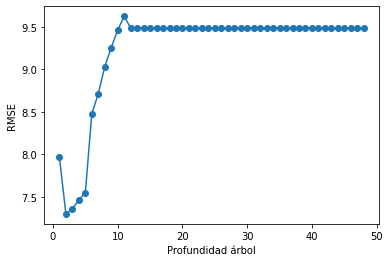

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

total_scores = []
for i in range(2, 50):
   regressor = DecisionTreeRegressor(max_depth=i, criterion = 'mse',random_state = 60)
   fold_accuracy = []
   for train_fold, test_fold in cv.split(train_prep, train_prep["school"]):
      # División train test aleatoria
      f_train = train_prep[selected_features].loc[train_fold]
      f_test = train_prep[selected_features].loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['G3'], axis=1), 
                           y = f_train['G3'])
      y_pred = regressor.predict(X = f_test.drop(['G3'], axis = 1))
      # evaluación del modelo
      rmse = mean_squared_error(f_test['G3'], y_pred)
      fold_accuracy.append(rmse)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   

max_depth = np.argmin(total_scores) + 2
print ('Min Value ' + str(np.min(total_scores)) +" (" + str(max_depth) + ")")
plt.plot(range(1,len(total_scores)+1), total_scores, 
         marker='o')
plt.ylabel('RMSE')  
plt.xlabel('Profundidad árbol')
plt.show() 


El menor valor RMSE es **7.29** con un árbol de profundidad **3**.

##### Construcción y evaluación del modelo DecisionTree

In [ ]:
regressor_DT = DecisionTreeRegressor(max_depth = max_depth, criterion = 'mse', random_state= 60)

In [ ]:
regressor_DT.fit( X = train_features.drop(['G3'], axis=1), y = train_features['G3'])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=60, splitter='best')

In [ ]:
y_pred = regressor_DT.predict(validation_features.drop(['G3'],axis=1)) 

In [ ]:
rmse = mean_squared_error(validation['G3'], y_pred) 
print ('RMSE', rmse)

RMSE 14.716165205225014


En este caso, el resultado final del RMSE obtenido con el uso del conjunto de datos de validación es **14.71**.


#### KNN

Al usarse la librería *scikit-learn*, existen distintos parámetros que afectan al resultado del algoritmo, y son los siguientes:


*   **KNeighbors**: KNeihgbors está basado en el estudio de los k vecinos más cercanos para cada punto.

*   **k**: Un número k mayor suprime el efecto del ruido pero hace a los límites de clasificación más distintos.

*  **Pesos** : dos posibles valores, "uniform" cada vecino tiene el mismo peso, "distance" se asigna un peso a cada vecino proporcional a la distancia que esté del elemento referencia. También se puede definir una dfunción por parte del usuario

Además, como medida de éxito se va a utilizar el Error Absoluto Medio (MAE).

##### Parametrización

Para poder implementar el modelo KNN se utiliza del módulo *sklearn* la clase *neighbors*. De esta clase se utiliza el modelo *neighbors.KNeighborsRegressor*. 

Min Value uniform : 7.5133653333333354 (25)
Min Value distance : 9.240767381822415 (19)


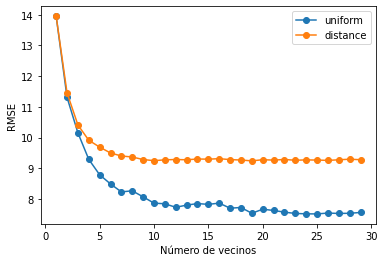

In [ ]:
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train_prep, train_prep["school"]):
          # División train test aleatoria
          f_train = train_prep[selected_features].loc[train_fold]
          f_test = train_prep[selected_features].loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['G3'], axis=1), 
                               y = f_train['G3'])
          y_pred = knn.predict(X = f_test.drop(['G3'], axis = 1))
          # evaluación del modelo
          rmse = mean_squared_error(f_test['G3'], y_pred)
          fold_accuracy.append(rmse)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(np.min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('RMSE')      
   plt.xlabel('Número de vecinos') 

plt.legend()
plt.show() 

El valor mínimo se obtiene para la función de peso **uniform**.

El menor MAE obtenido es **7.51** para **25** vecinos.

##### Construcción y evaluación del modelo KNN

In [ ]:
#se construye el modelo con los mejores valores obtenidos en el entrenamiento
n_neighbors = 25
weights = 'uniform'
regressor_KNN = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
regressor_KNN


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='uniform')

In [ ]:
# se entrena y se predice
regressor_KNN.fit( X = train_features.drop(['G3'], axis=1), y = train_features['G3'])
y_pred = regressor_KNN.predict(validation_features.drop(['G3'],axis=1))
rmse = mean_squared_error(validation['G3'], y_pred)
print ('RMSE', rmse)

RMSE 12.20845


Para el modelo **KNN** se ha obtenido un RMSE de **12.20** al predecir el conjunto de datos de validación.  

#### KernelRidge

##### Evaluación y predicción con el regressor KernelRidge

In [ ]:
from sklearn.kernel_ridge import KernelRidge
regressor_KernelRidge =KernelRidge(alpha =1.0, kernel = 'rbf')

# Fit the random search model
regressor_KernelRidge.fit(X = train_features.drop(['G3'], axis=1), y = train_features['G3'])

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='rbf',
            kernel_params=None)

In [ ]:
y_pred = regressor_KernelRidge.predict(validation_features.drop(['G3'],axis=1))

In [ ]:
rmse = mean_squared_error(validation['G3'], y_pred)
print ('RMSE', rmse)

RMSE 11.450445959697113


### Optimización de parámetros del modelo con mejor resultado: RandomForest

Parámetros que componen el estimador *RandomForestRegressor*:
* *n_estimators*: número de árboles
* *criterion*: función que mide la calidad de la división (mse, mae)
* *max_depth*: rofundidad máxima del árbol
* *min_samples_split*: número mínimo de muestras para dividir un nodo interno
* *min_samples_leaf*: número mínimo de muestras para estar en un nodo hoja
* *min_weigtht_fraction_leaf*: fracción ponderada mínima de la suma total de peso que se necesita para estar en un nodo hoja
* *max_features*: cantidad de características para buscar la mejor división
* *max_leaf_nodes*: número máximo de nodos por hoja
* *min_impurity_decrease*: un nodo se divide si la división disminuye la impureza a este valor
* *min_impurity_split*: umbral de parada de crecimiento de árbol. Un nodo se divide si su impureza es superior al valor, sino, es una hoja
* *bootstrap*: si se utilizan muestras bootstrap o no 
* *oob_score*: si se utilizan muestras fuera de bolsa para la puntuación
* *n_jobs*: número de trabajos ejecutados en paralelo
* *random_state*: semilla para que si el resultado es aleatorio siempre de el mismo resultado
* *verbose*: controla verbosidad 
* *warm_start*
* *ccp_alpha*
* *max_samples*

In [ ]:
regressor = RandomForestRegressor() 
regressor

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Parametrización

En la predicción realizada anteriormente se uso el estimador con los siguientes parámetros:
* bootstrap=True
* ccp_alpha=0.0 
* criterion='mse'
* max_depth=None 
* max_features='auto'
* max_leaf_nodes=None
* max_samples=None
* min_impurity_decrease=0.0
* min_impurity_split=None
* min_samples_leaf=1
* min_samples_split=2
* min_weight_fraction_leaf=0.0
* n_estimators=36
* n_jobs=None
* oob_score=False
* random_state=0
* verbose=0
* warm_start=False

##### GridSearch

In [ ]:

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
param_dist = {"n_estimators": [4,8,16,32,56, 64, 78,100, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [8,6,4, 2, None], # Maximum number of levels in tree
              "min_samples_split":[2,5,4,10,14], #  Minimum number of samples required to split a node
              "min_samples_leaf": [4,8,12,16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ['mse'],
              "random_state" : [1]
            }

In [ ]:
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv=5)

grid_regres.fit(X = train_features.drop(['G3'], axis=1), y = train_features['G3'])

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
             iid='deprecated', n_jobs=None,
             param_grid={'bootstrap': [True, False], 'criterion': ['mse'],
  

In [ ]:
grid_regres.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=4, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
# se elige el mejor estimador
best_grid = grid_regres.best_estimator_

In [ ]:
# fit and predict
best_grid.fit( X = train_features.drop(['G3'], axis=1), y = train_features['G3'])
y_pred = best_grid.predict(validation_features.drop(['G3'],axis=1))

In [ ]:
mse = mean_squared_error(validation['G3'], y_pred)
print ('MSE', mse)

MSE 11.897588492594227


##### RandomSearch

In [ ]:
param_dist = {"n_estimators": [4,8,16,32,56, 64, 78,100, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [8,6,4, 2, None], # Maximum number of levels in tree
              "min_samples_split":[2,5,4,10,14], #  Minimum number of samples required to split a node
              "min_samples_leaf": [4,8,12,16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ['mse'],
              "random_state" : [2]
            }

In [ ]:
rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, 
                               n_iter = 100, cv = 5, random_state=2, n_jobs = -1)

# Fit the random search model
rnd_regres.fit(X = train_features.drop(['G3'], axis=1), y = train_features['G3'])

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
best_random = rnd_regres.best_estimator_
best_random


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=16,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=8, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [ ]:
# fit and predict
best_random.fit( X = train_features.drop(['G3'], axis=1), y = train_features['G3'])
y_pred = best_random.predict(X = validation_features.drop(['G3'], axis = 1))

# EVALUATE 
mse = mean_squared_error(validation['G3'], y_pred)
print ('MSE', mse)

MSE 11.83401369386657


### Predicción Final

Se utiliza el regresor obtenido de la optimización realizada con Random Search.

In [ ]:
y_pred = best_random.predict(test_features.drop(['G3'],axis=1))

A continuación, se predice la nota final del conjunto de datos de **test**.

In [ ]:
y_pred

array([12.45280626, 12.98326166, 12.03529485, 12.74874773, 13.05897033,
       11.91068185, 12.72944603, 12.74874773, 12.98326166, 13.05968056,
       12.74874773, 12.92184612, 12.74874773, 13.37407722, 12.93262422,
       12.74874773, 12.92113589, 13.04878671, 13.64170502, 13.64170502,
       10.98520086, 10.82922006, 11.02989736,  8.57538856, 12.27655652,
        9.684957  , 12.06314555, 12.35993335, 11.94802607, 10.7452975 ])

Debido a que no existen valores negativos de nota final, se eliminarán los valores negativos. 

In [ ]:
res = np.hstack(y_pred)
y_pred_no_neg = res.copy()
y_pred_no_neg[y_pred < 0] = 0   

In [ ]:
y_pred_no_neg

array([12.45280626, 12.98326166, 12.03529485, 12.74874773, 13.05897033,
       11.91068185, 12.72944603, 12.74874773, 12.98326166, 13.05968056,
       12.74874773, 12.92184612, 12.74874773, 13.37407722, 12.93262422,
       12.74874773, 12.92113589, 13.04878671, 13.64170502, 13.64170502,
       10.98520086, 10.82922006, 11.02989736,  8.57538856, 12.27655652,
        9.684957  , 12.06314555, 12.35993335, 11.94802607, 10.7452975 ])

A continuación, se obtiene el RMSE para el conjunto de datos de test. En este caso, el RMSE final es de **0.13**. 

In [ ]:
rmse = mean_squared_error(test['G3'], y_pred)
print ('RMSE', rmse)

RMSE 6.882147349433975


Finalmente, se obtiene un dataframe final con las variables más características y la nota predicha. 

Además, se descarga un fichero csv para tener estos resultados.

In [ ]:
output = pd.DataFrame({ 'Escuela': test['school'], 'Sexo': test['sex'], 'Edad': test['age'], 
                       'Suspensos': test['failures'],'Educación Madre': test['Medu'],
                       'Tiempo de Estudio': test['studytime'],'Intención Carrera': test['G3'],'Nota Final': y_pred_no_neg})


from google.colab import files

with open('RandomForest_RandomSearch.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('RandomForest_RandomSearch.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Escuela,Sexo,Edad,Suspensos,Educación Madre,Tiempo de Estudio,Intención Carrera,Nota Final
382,GP,F,17,0,3,1,11,12.452806
383,GP,M,18,0,2,4,12,12.983262
384,GP,M,19,0,3,1,10,12.035295
385,GP,F,18,0,2,2,10,12.748748
386,GP,F,17,0,2,3,15,13.058970


Tras realizar la predicción, se puede visualizar el resultado de esta mediante una gráfica que muestra los datos reales y los datos predichos. 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


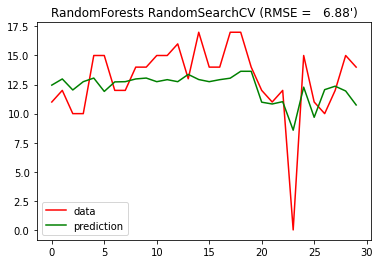

In [ ]:
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['G3'].shape[0]))
plt.plot(xx, test['G3'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests RandomSearchCV (RMSE = %6.2f')" % (rmse))

plt.show()

## Clustering. Patrones entre estudiantes.

En este apartado se va a buscar un patrón entre los distintos estudiantes.

En primer lugar, se van a seleccionar las variables que se utilizaran en el clustering


Estas características son las que se usarán para realizar el clustering: *final* y *studytime*. Debido a que es interesante conocer los porcentajes de alumnos que estudian y aprueban y quienes al contrario. 

### Métodos de clustering

#### Clustering jerárquico aglomerativo

El primer paso es importar las libterías que se necesitan. 

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
np.set_printoptions(precision=5, suppress=True)

A continuación, se seleccionan las variables mencionadas anteriormente 

In [ ]:
seleccion= ['studytime','G3']
datos_seleccion = datos_prep[seleccion]
datos_seleccion.head()

,studytime,G3
0,2.0,11.0
1,2.0,11.0
2,2.0,12.0
3,3.0,14.0
4,2.0,13.0


Para realizar el clustering se utiliza el agrupamiento mediante el modelo *linkage*. 

Esta clase permite elegir el método de agrupamiento:
* *single*: disimilitud mínima
* *complete*: disimilitud máxima
* *average*: disimilitud media

Además, permite seleccionar la medida de disimilitud mediante la cual se medirán las distancias entre clusters: *euclidean*, *cityblock*, *hamming*, *cosine*...

In [ ]:
Z =linkage(datos_seleccion, method='average', metric='euclidean') #se tiene el agrupamiento obtenido ya

En este caso, se ha seleccionado el agrupamiento *average* y como medidad de disimilitud la que se usa por defecto, *euclidean*.

A continuación, se obtendrá la medida de bondad del clustering mediante la función *cophenet* perteneciente a la librería *scipy.cluster.hierarchy*.

Su funcionamiento se basa en comparar las distancias reales entre todas las muestras con las que el clustering obtiene. Cuanto más cerca de 1 esté la medidad de bondad, mejor resultado es. 

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(datos_seleccion)) 
print(c)

0.8239143696938893


En la siguiente celda se visualiza la salida del clustering, que es de la siguiente forma:

[idx1, idx2, distancia, número de muestras]

En este caso podéis ver cómo el algoritmo ha decidido unir los clusters **0** y **478**, que tenían una distancia de **0**, y esta operación dió como resultado un cluster con 2 instancias. 


In [ ]:
Z[:20]

array([[  0.,   1.,   0.,   2.],
       [ 30., 649.,   0.,   3.],
       [  2.,  29.,   0.,   2.],
       [  3.,  16.,   0.,   2.],
       [  4.,   5.,   0.,   2.],
       [  6., 653.,   0.,   3.],
       [  7., 654.,   0.,   4.],
       [  9., 655.,   0.,   5.],
       [  8., 183.,   0.,   2.],
       [ 13., 656.,   0.,   6.],
       [ 10.,  17.,   0.,   2.],
       [ 11.,  37.,   0.,   2.],
       [ 12.,  19.,   0.,   2.],
       [ 28., 658.,   0.,   7.],
       [ 14.,  87.,   0.,   2.],
       [ 15., 344.,   0.,   2.],
       [ 36., 652.,   0.,   3.],
       [ 20., 659.,   0.,   3.],
       [ 18., 255.,   0.,   2.],
       [ 21., 661.,   0.,   3.]])

Cabe destacar, que por ejemplo en la línea 2 las muestras que se unen son: **30** y **649**, pero el dataset tiene 649 muestras. Esto significa que el cluster *1*, formado por las muestras **0** y **1** se unen con la **30**. 

A continuación, se muestran sus posiciones para ver las distancias. 

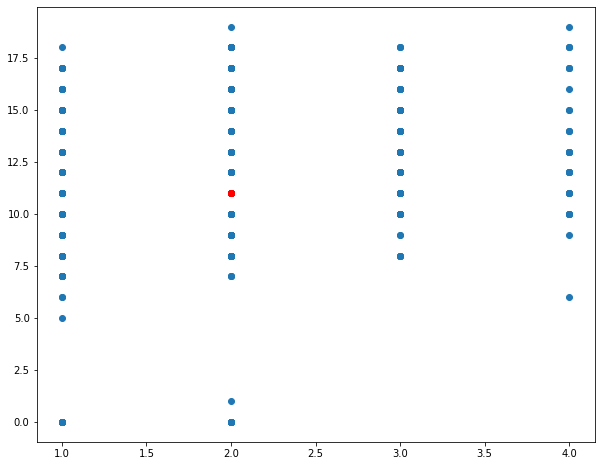

    studytime    G3
0         2.0  11.0
1         2.0  11.0
30        2.0  11.0


In [ ]:
idxs = [0, 1, 30]
plt.figure(figsize=(10, 8))
plt.scatter(datos_seleccion.iloc[:,0], datos_seleccion.iloc[:,1])  # plot all points
plt.scatter(datos_seleccion.iloc[idxs,0], datos_seleccion.iloc[idxs,1], c='r')  # plot interesting points in red again
plt.show()

print(datos_seleccion.iloc[idxs])

En la siguiente celda, se puede ver el dendograma.

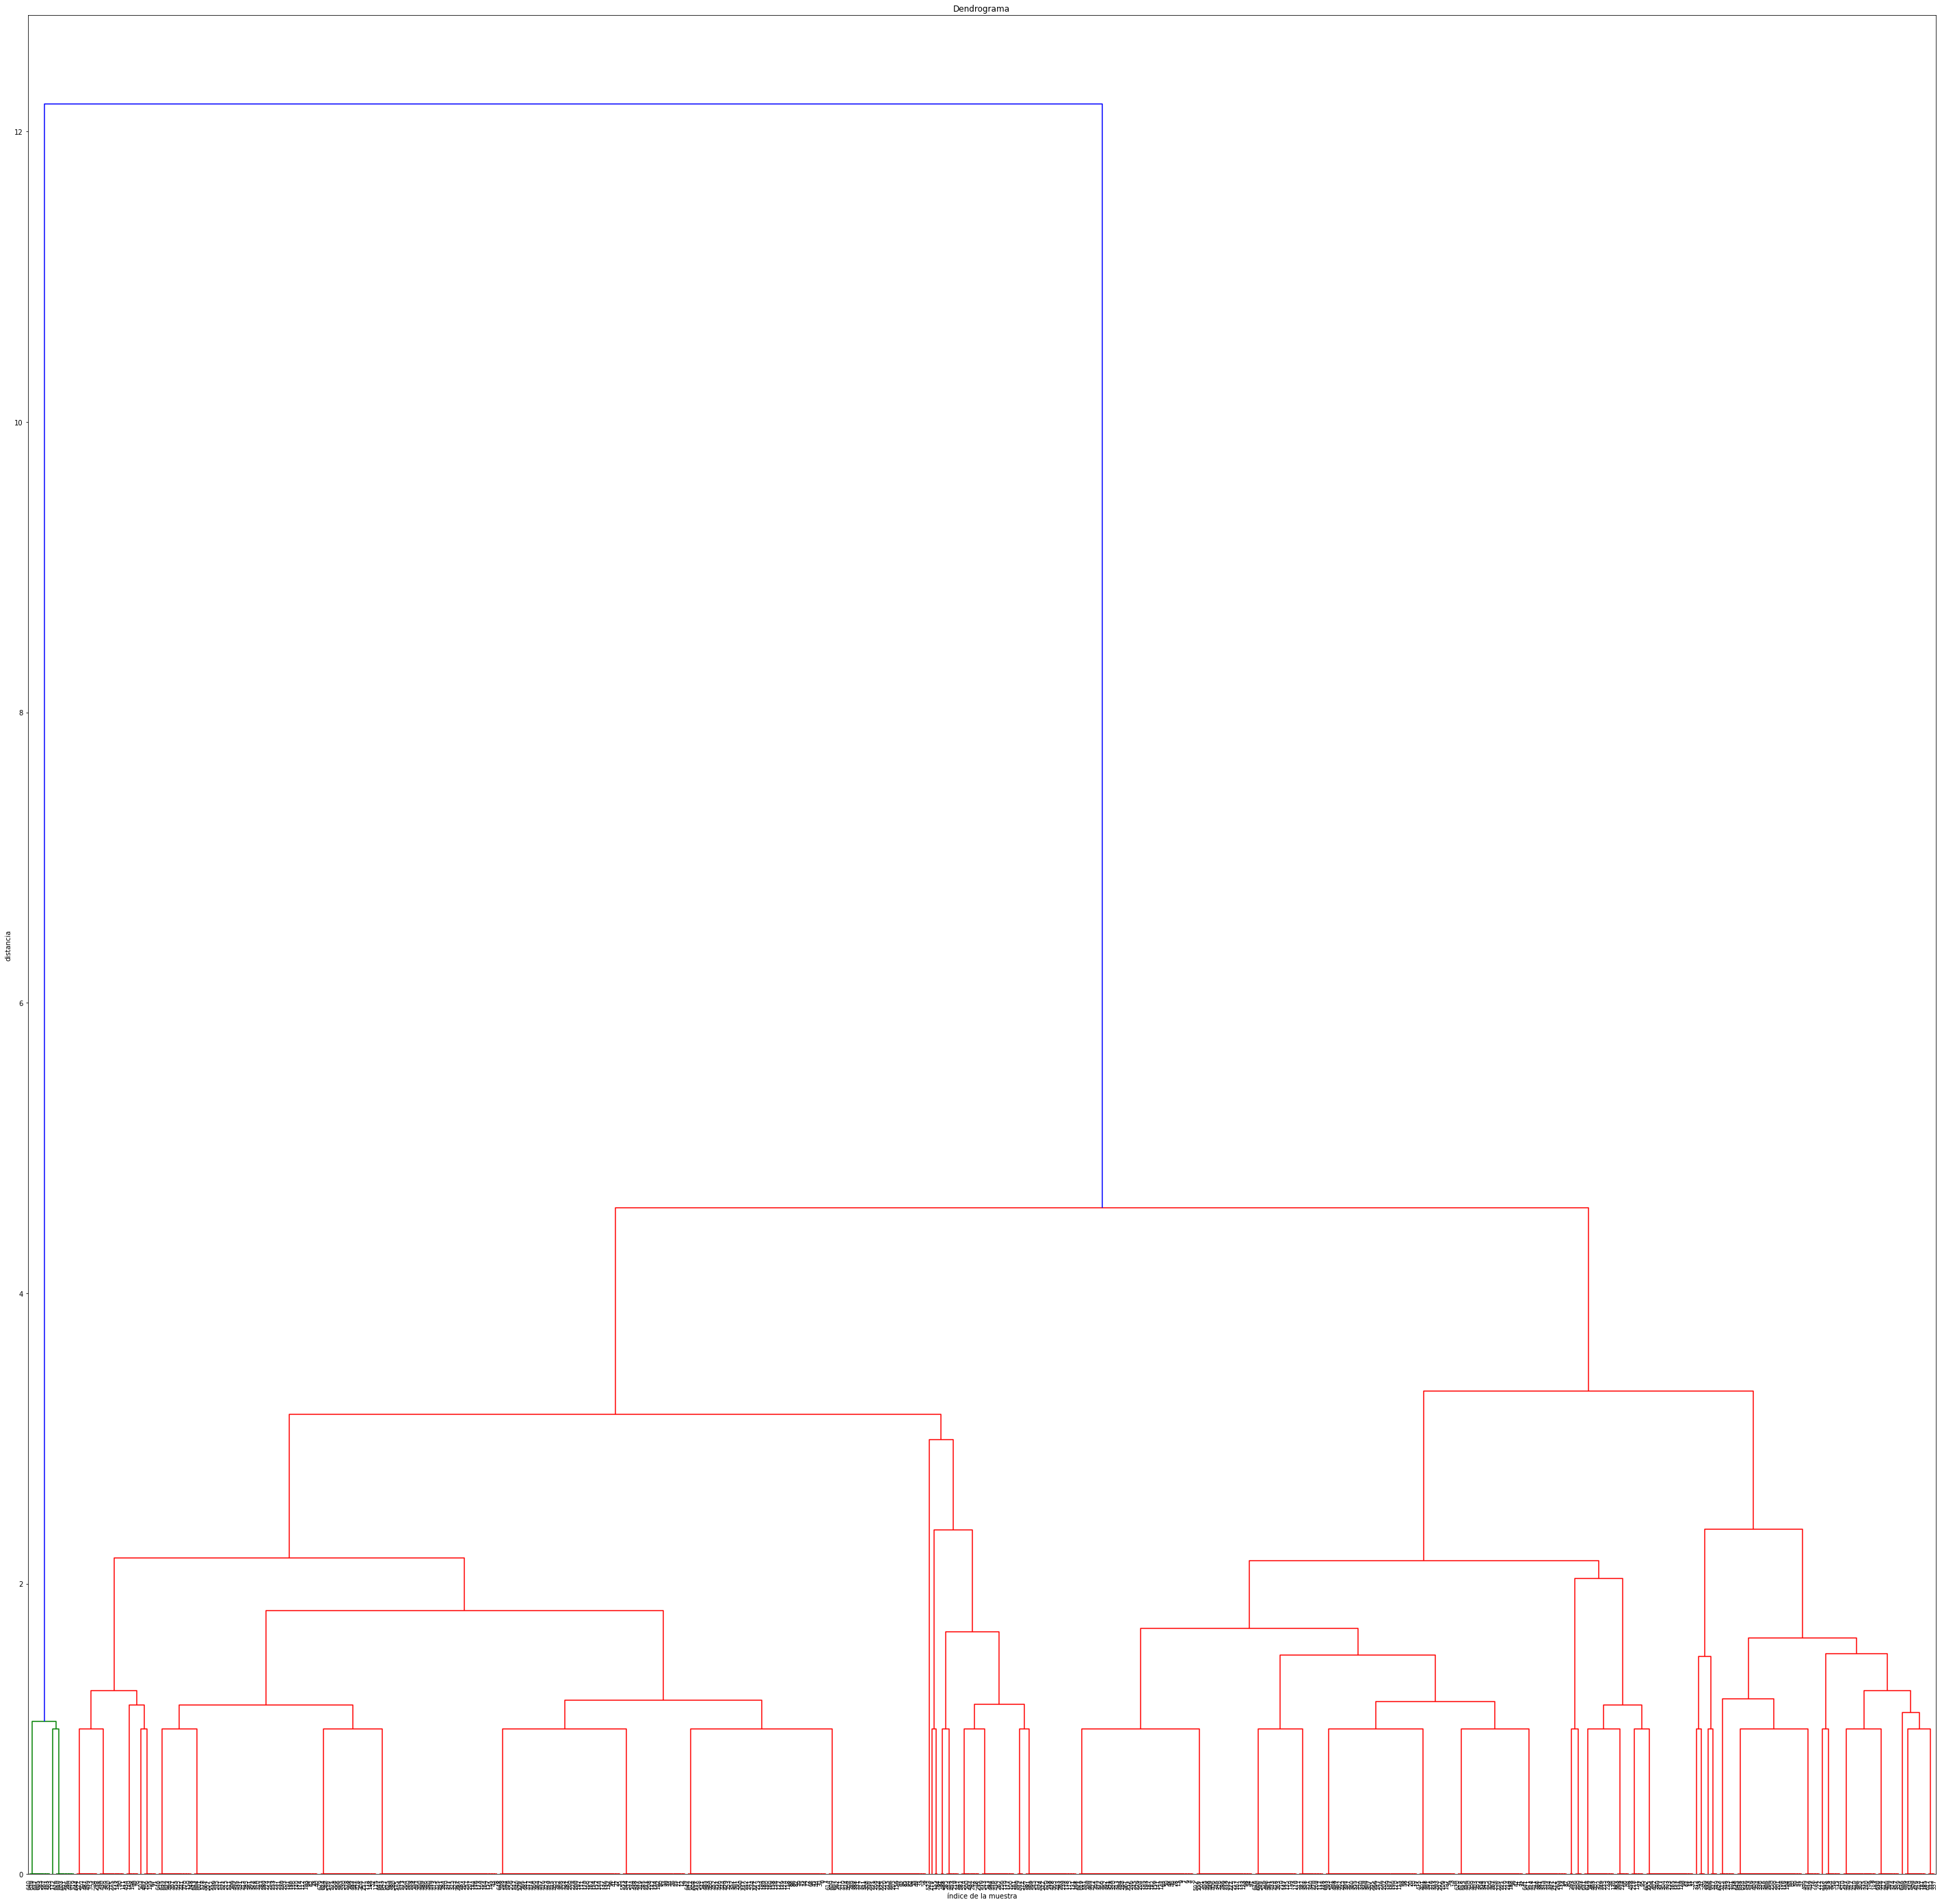

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(50, 50))
plt.title('Dendrograma')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Para entender cómo se lee un dendograma hay que tener en cuenta que:
* líneas horizontales: uniones de clusters
* líneas verticales: clusters pertenecientes
* altura de líneas verticales: distancia cubierta en la unión

Si se realiza un "corte" a la altura de 4, se obtendrían 3 clusters distintos. 

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(datos_seleccion) #ajustar y predecir
print(clusters)


[1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0
 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 2 1 0 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 1
 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0
 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0
 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0
 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 2 1 0 1
 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

Aquí se muestra a que cluster pertecene cada muestra.

##### Visualización clusters

Para poder visualizar los clusters en los datos, primero se mostrarán los datos limpios, es decir, sin marcar los clusters y a continuación, se indicarán mediante distintos colores la división de estos.

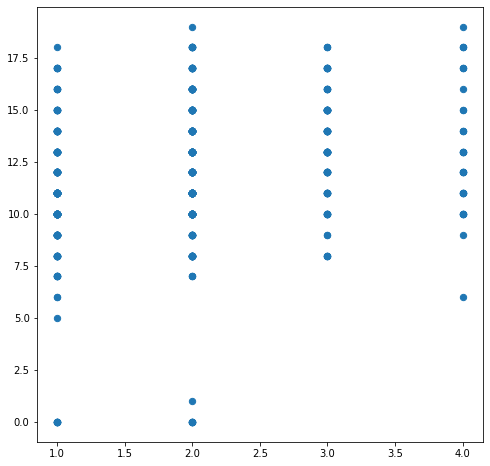

In [ ]:
# mostramos los datos originales
plt.scatter(datos_seleccion.iloc[:, 0], datos_seleccion.iloc[:, 1], s=40, cmap='viridis');

Text(0, 0.5, 'G3')

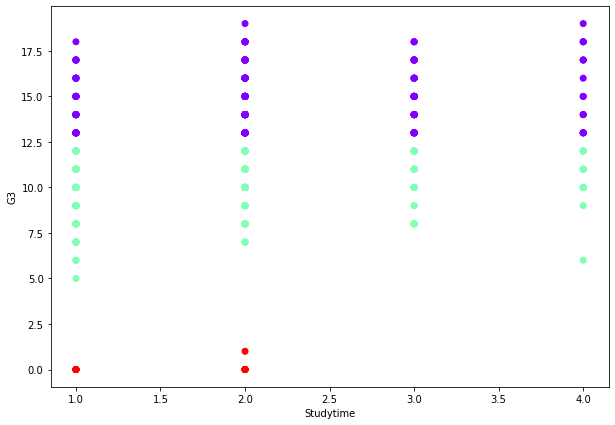

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(datos_seleccion.iloc[:,0],datos_seleccion.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Studytime")
plt.ylabel("G3")

Se puede determinar que en función de las horas de estudio es más probable sacar una nota u otra. 
Los alumnos que estudian en los niveles 3 y 4 ( mirar horas) sus notas están por encima del 10 mayoritariamente (10/20). En cambio, para los alumnos en los niveles 1 y 2, las notas llegan a ser de 1/20. Aunque hay que recalcar que también existen valores altos para gente que no estudia.

#### Clustering probabilístico


Para realizar clustering probabilístico se utiliza el modelo *Gaussian Mixture Models*. Este método es similar al *k-means*, pero más potente. 

Un modelo *Gaussian Mixture* encuentra una mezcla de distribuciones Gaussianas que sean capaces de generar los datos.

Text(0, 0.5, 'G3')

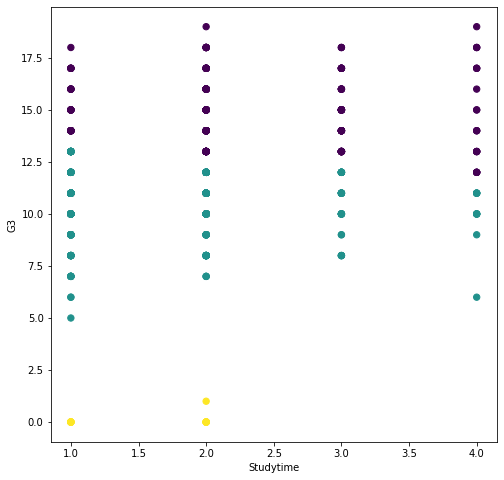

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3).fit(datos_seleccion)
labels = gmm.predict(datos_seleccion)
plt.scatter(datos_seleccion.iloc[:, 0], datos_seleccion.iloc[:, 1], c=labels, s=40, cmap='viridis');
plt.xlabel("Studytime")
plt.ylabel("G3")

Se puede ver como este modelo, de forma sencilla, obtiene un resultado similar al que obtiene el k-means. 

Con el modelo GMM, no solo podemos encontrar a qué cluster pertenece cada muestra, sino también con qué probabilidad.

Esto lo podemos hacer usando la función *predict_proba*, que devuelve una matriz de tamaño [n_samples, n_clusters] que mide la probabilidad de cada punto de pertenecer a cada cluster:

In [ ]:
probs = gmm.predict_proba(datos_seleccion)
print(probs[40:50].round(3))

[[0.047 0.953 0.   ]
 [0.09  0.91  0.   ]
 [0.939 0.061 0.   ]
 [0.034 0.966 0.   ]
 [0.117 0.883 0.   ]
 [0.117 0.883 0.   ]
 [0.548 0.452 0.   ]
 [0.999 0.001 0.   ]
 [0.548 0.452 0.   ]
 [0.278 0.722 0.   ]]


Text(0, 0.5, 'G3')

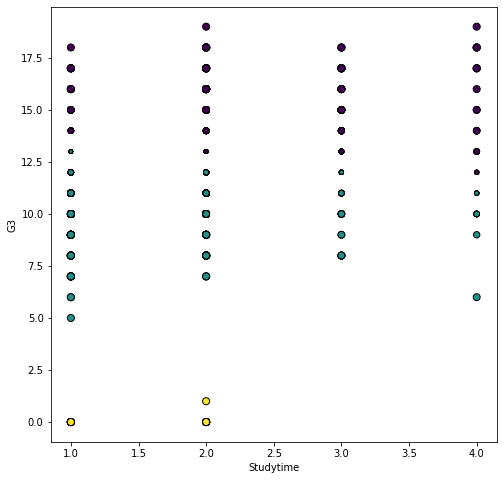

In [ ]:
size = 50 * probs.max(1) ** 2  
plt.scatter(datos_seleccion.iloc[:, 0], datos_seleccion.iloc[:, 1], c=labels, cmap='viridis', s=size, edgecolor='k');
plt.xlabel("Studytime")
plt.ylabel("G3")

Mediante este modelo se puede predecir la probabilidad que tendran de sacar estas notas los alumnos segun lo que hayan estudiado. 
los puntos más pequeños son los que se encuentran entre dos clusters, es decir, que tienen menor probabilidad de pertenecer a uno en concreto.

## Clasificación

Se usará el método de clasificación para detectar cuando un alumno aprobará o suspenderá la asignatura. 

### Transformación del problema 

El primer paso es discretizar las notas finales. Si son superiores a 10 se considera que el alumno aprueba, si son inferiores, suspende.

In [ ]:
datos_discretizados = datos_prep.copy(deep=True)
datos_discretizados

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,0.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,15.0,1.0,1.0,1.0,2.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,0.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,19.0,2.0,3.0,1.0,3.0,1.0,5.0,4.0,2.0,1.0,2.0,5.0,4.0,10.0,11.0,10.0
645,1.0,0.0,1.0,1.0,1.0,4.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,18.0,3.0,1.0,1.0,2.0,0.0,4.0,3.0,4.0,1.0,1.0,1.0,4.0,15.0,15.0,16.0
646,1.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,18.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,5.0,6.0,11.0,12.0,9.0
647,1.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,17.0,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,3.0,4.0,2.0,6.0,10.0,10.0,10.0


In [ ]:
def discretiza(x):
    if x < 10:
        return 0
    elif x >= 10:
        return 1

In [ ]:
datos_discretizados.insert(33,"Estado",datos_discretizados['G3'],True)

In [ ]:
datos_discretizados['Estado'] = datos_discretizados['Estado'].map(lambda x: discretiza(x))
datos_discretizados

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Estado
0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0,1
1,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0,1
2,0.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,15.0,1.0,1.0,1.0,2.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0,1
3,0.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0,1
4,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,19.0,2.0,3.0,1.0,3.0,1.0,5.0,4.0,2.0,1.0,2.0,5.0,4.0,10.0,11.0,10.0,1
645,1.0,0.0,1.0,1.0,1.0,4.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,18.0,3.0,1.0,1.0,2.0,0.0,4.0,3.0,4.0,1.0,1.0,1.0,4.0,15.0,15.0,16.0,1
646,1.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,18.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,5.0,6.0,11.0,12.0,9.0,0
647,1.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,17.0,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,3.0,4.0,2.0,6.0,10.0,10.0,10.0,1


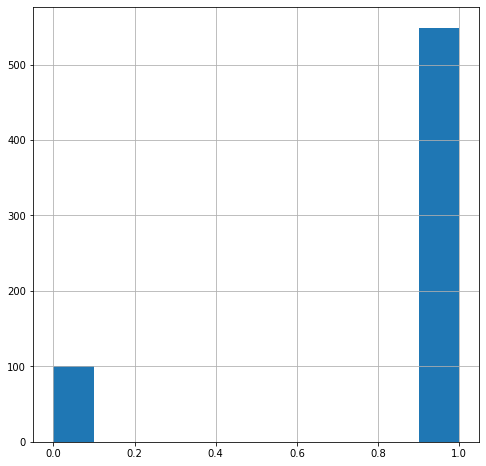

In [ ]:
datos_discretizados['Estado'].hist()

Diagramas de correlación para indicar cuanto de relacionados están los atributos predictores con el valor a predecir.

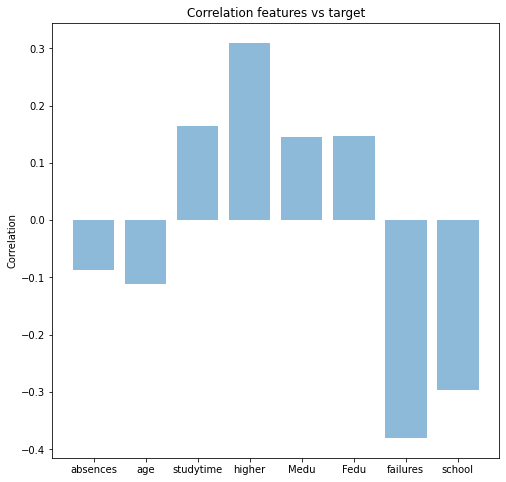

[-0.08748280690435443,
 -0.11072210799523186,
 0.16511081549233916,
 0.30970781372016204,
 0.14480259585376215,
 0.14624905788370465,
 -0.38023716633053817,
 -0.2972171022452865]

In [ ]:
from scipy.stats.stats import pearsonr 
corr = [pearsonr(datos_discretizados['absences'], datos_discretizados['Estado'])[0], pearsonr(datos_discretizados['age'], datos_discretizados['Estado'])[0], 
        pearsonr(datos_discretizados['studytime'], datos_discretizados['Estado'])[0], pearsonr(datos_discretizados['higher'], datos_discretizados['Estado'])[0],
        pearsonr(datos_discretizados['Medu'], datos_discretizados['Estado'])[0], pearsonr(datos_discretizados['Fedu'], datos_discretizados['Estado'])[0],
        pearsonr(datos_discretizados['failures'], datos_discretizados['Estado'])[0], pearsonr(datos_discretizados['school'], datos_discretizados['Estado'])[0]]

 
features = ['absences', 'age', 'studytime', 'higher', 'Medu', 'Fedu', 'failures', 'school']
y_pos = np.arange(len(features))
 
plt.bar(y_pos, corr, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('Correlation')
plt.title('Correlation features vs target')

plt.show()

corr

En valor absoluto, las más correlacionadas son: failures, higher y school.

In [ ]:
train_discretizados = train_prep.copy(deep=True)
test_discretizados = test_prep.copy(deep=True)
validation_discretizados = validation_prep.copy(deep=True)

In [ ]:
train_discretizados.insert(33,"Estado",train_discretizados['G3'],True)
test_discretizados.insert(33,"Estado",test_discretizados['G3'],True)
validation_discretizados.insert(33,"Estado",validation_discretizados['G3'],True)

In [ ]:
train_discretizados['Estado'] = train_discretizados['Estado'].map(lambda x: discretiza(x)) 
test_discretizados['Estado'] = test_discretizados['Estado'].map(lambda x: discretiza(x)) 
validation_discretizados['Estado'] = validation_discretizados['Estado'].map(lambda x: discretiza(x)) 

In [ ]:
features = ['failures', 'higher', 'school', 'Estado']
train_dis_features = train_discretizados[features]
test_dis_features = test_discretizados[features]
validation_dis_features = validation_discretizados[features]

In [ ]:
train_dis_features

,failures,higher,school,Estado
0,0.0,1.0,0.0,1
1,0.0,1.0,0.0,1
2,0.0,1.0,0.0,1
3,0.0,1.0,0.0,1
4,0.0,1.0,0.0,1
...,...,...,...,...
582,0.0,1.0,1.0,1
583,0.0,1.0,1.0,0
584,1.0,0.0,1.0,1
585,1.0,0.0,1.0,0


### Evaluación de modelos

#### DecisionTree

##### Parametrización

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Max Depth Value 0.8664815897136178 (3)


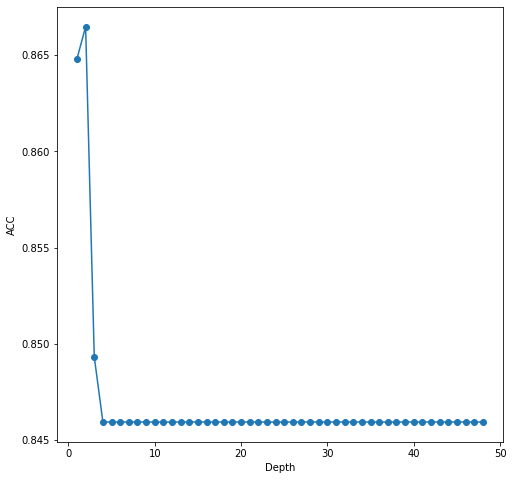

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# CROSS VALIDATION ANALYSIS
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

cv = KFold(n_splits = 10, shuffle = False, random_state=16) # 

# reset index
train_dis_features.reset_index(drop = True, inplace = True)
train_dis_features.head()

total_scores = []
for i in range(2, 50):
   model i= DecisionTreeClassifer(criterion='gini', max_depth=i, random_state= 16)
   fold_accuracy = []
   for train_fold, test_fold in cv.split(train_dis_features):
      # División train test aleatoria
      f_train = train_dis_features.loc[train_fold]
      f_test = train_dis_features.loc[test_fold]
      # entrenamiento y ejecución del modelo
      model.fit( X = f_train.drop(['Estado'], axis=1), y = f_train['Estado'])
      y_pred = model.predict(X = f_test.drop(['Estado'], axis = 1))
      # evaluación del modelo
      acc = accuracy_score(f_test['Estado'], y_pred)
      fold_accuracy.append(acc)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


max_depth = np.argmax(total_scores) + 2 # +2 porque range(2, 50) y argmax 
# devuelve el índice del vector cuyo valor es máximo, y ese vector está indexado comenzando en 0
print ('Max Depth Value ' + str(max(total_scores)) +" (" + str(max_depth) + ")")

  
plt.plot(range(1,len(total_scores)+1), total_scores, 
         marker='o')
plt.ylabel('ACC')   
plt.xlabel('Depth')
plt.show() 


Max Depth Value 0.8664815897136178 (3).

Se utilizan 3 árboles con una profundidad máxima de: 0.866.

##### Construcción y ejecución del modelo

In [ ]:
#Clasificador
classifier = DecisionTreeClassifier(criterion='gini', max_depth = max_depth, random_state=16)


In [ ]:
# fit and predict
classifier.fit( X = train_dis_features.drop(['Estado'], axis=1), y = train_dis_features['Estado'])
y_pred = classifier.predict(X = validation_dis_features.drop(['Estado'], axis = 1))


In [ ]:
mse = mean_squared_error(validation_dis_features['Estado'], y_pred)
print ('MSE', mse)

MSE 0.125


In [ ]:
acc = accuracy_score(validation_dis_features['Estado'], y_pred)
print ('Acc', acc)

Acc 0.875


##### Comprobación resultado final: Matriz de Confusión

Por último probamos visualizamos como ha quedado nuestra predicción con la realidad.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.96      0.90      0.93        29

    accuracy                           0.88        32
   macro avg       0.68      0.78      0.71        32
weighted avg       0.91      0.88      0.89        32

Confusion matrix, without normalization
[[ 2  1]
 [ 3 26]]


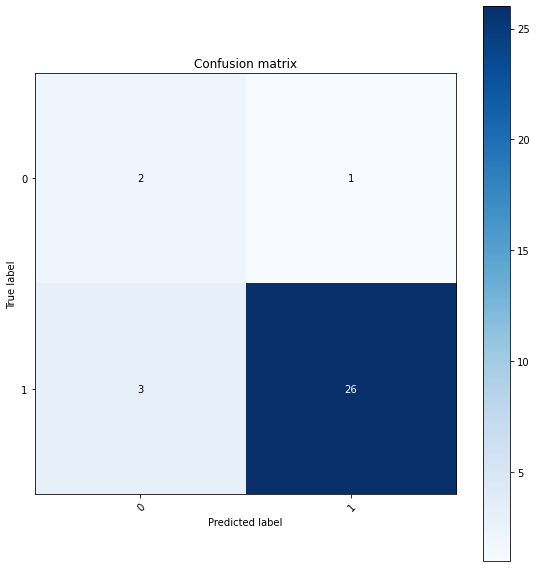

In [ ]:
from sklearn.metrics import classification_report
y_true = validation_dis_features['Estado']
print(classification_report(y_true, y_pred))

plot_confusion_matrix(y_true, y_pred, normalize=False, classes=model.classes_, title='Confusion matrix')  

Se puede observar como hemos clasificado 28 casos correctamente y hemos fallado en 4 casos. 

#### KNN

##### Parametrización

Max Value uniform : 0.8561659848042081 (28)
Max Value distance : 0.8528345996493278 (12)


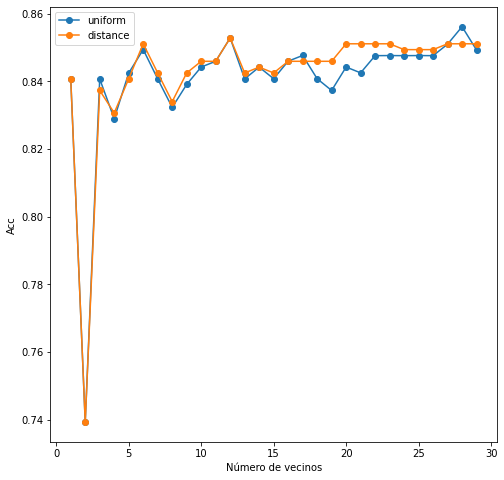

In [ ]:
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
       for train_fold, test_fold in cv.split(train_dis_features):
          # División train test aleatoria
          f_train = train_dis_features.loc[train_fold]
          f_test = train_dis_features.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['Estado'], axis=1), 
                               y = f_train['Estado'])
          y_pred = knn.predict(X = f_test.drop(['Estado'], axis = 1))
          # evaluación del modelo
          acc = accuracy_score(f_test['Estado'], y_pred)
          fold_accuracy.append(acc)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
   plt.ylabel('Acc') 
   plt.xlabel("Número de vecinos")     
    

plt.legend()
plt.show() 

Max Value uniform : 0.8561659848042081 (28)


##### Construcción y ejecución del modelo

In [ ]:
# constructor
n_neighbors = 28
weights = 'uniform'
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights) 


In [ ]:
# fit and predict
knn.fit( X = train_dis_features.drop(['Estado'], axis=1), y = train_dis_features['Estado'])
y_pred = knn.predict(X = validation_dis_features.drop(['Estado'], axis = 1))


In [ ]:
acc = accuracy_score(validation_dis_features['Estado'], y_pred)
print ('Acc', acc)


Acc 0.875


In [ ]:
mse = mean_squared_error(validation_dis_features['Estado'], y_pred)
print ('MSE', mse)

MSE 0.125


##### Comprobación resultado final: Matriz de Confusión

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.90      0.97      0.93        29

    accuracy                           0.88        32
   macro avg       0.45      0.48      0.47        32
weighted avg       0.82      0.88      0.85        32

Confusion matrix, without normalization
[[ 0  3]
 [ 1 28]]


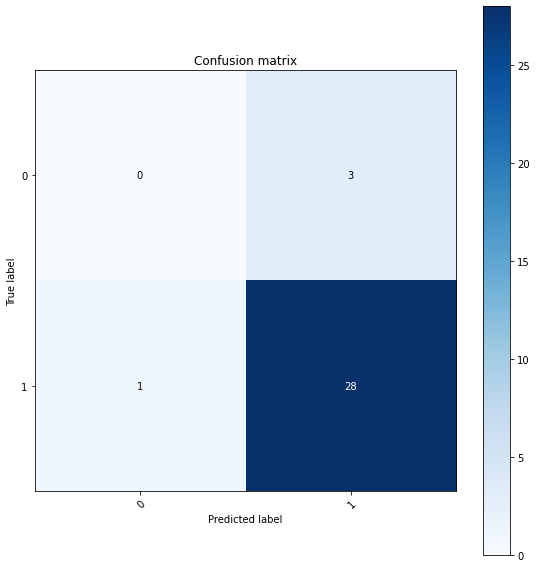

In [ ]:
y_true = validation_dis_features['Estado']
print(classification_report(y_true, y_pred))

plot_confusion_matrix(y_true, y_pred, normalize=False, classes=model.classes_, title='Confusion matrix')  

En este caso, 28 casos han sido clasificados correctamente, y solo se ha fallado en la clasificación de u4 alumno. 

#### NaiveBayes

##### Parametrización

Se selecciona el modelo: Gaussian, Multinomial, Bernouilli y Complement.

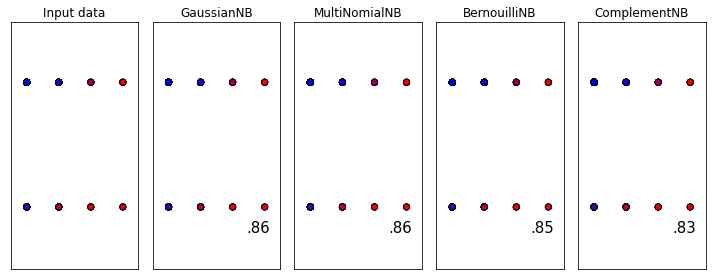

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB


# plotting variables
h = .02  # step size in the mesh
i = 1
figure = plt.figure(figsize=(10, 4))

# classifiers
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()]


# train and test
X_train, X_test, y_train, y_test = \
        train_test_split( train_dis_features.drop(['Estado'], axis=1),train_dis_features['Estado'], test_size=.4, random_state=42)


# prepare visualization
x_min, x_max = train_dis_features.iloc[:, 0].min() - .5, train_dis_features.iloc[:, 0].max() + .5
y_min, y_max = train_dis_features.iloc[:, 1].min() - .5, train_dis_features.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cm_bright,
         edgecolors='k')
# Plot the testing points
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
              edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

for name, clf in zip(names, classifiers):
  ax = plt.subplot(1, len(classifiers) + 1, i)
  
  # FIT THE MODEL
  clf.fit(X_train, y_train)
  # PREDIT AND SCORE  
  score = clf.score(X_test, y_test) #Returns the mean accuracy on the given test data and labels.
  
  

  # Plot the training points
  ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cm_bright,
             edgecolors='k')
  # Plot the testing points
  ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap=cm_bright,
             edgecolors='k', alpha=0.6)

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(name)
  ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
          size=15, horizontalalignment='right')
  i += 1
  
plt.tight_layout()
plt.show()

Se estudia la precisión de Gaussian y Multinomial con el conjunto de datos de validation

##### Construcción y ejecución del modelo Gaussian

In [ ]:
gaussian = GaussianNB() 

gaussian.fit( X = train_dis_features.drop(['Estado'], axis=1), y = train_dis_features['Estado'])
y_pred_gaussian = gaussian.predict(X = validation_dis_features.drop(['Estado'], axis = 1))

In [ ]:
acc = accuracy_score(validation_dis_features['Estado'], y_pred_gaussian)
print ('Acc', acc)


Acc 0.78125


In [ ]:
mse = mean_squared_error(validation_dis_features['Estado'], y_pred_gaussian)
print ('MSE', mse)

MSE 0.21875


##### Construcción y ejecución del modelo Multinomial

In [ ]:
multinomial = MultinomialNB() 

multinomial.fit( X = train_dis_features.drop(['Estado'], axis=1), y = train_dis_features['Estado'])
y_pred_multinomial = multinomial.predict(X = validation_dis_features.drop(['Estado'], axis = 1))

In [ ]:
acc = accuracy_score(validation_dis_features['Estado'], y_pred_multinomial)
print ('Acc', acc)

Acc 0.84375


In [ ]:
mse = mean_squared_error(validation_dis_features['Estado'], y_pred_multinomial)
print ('MSE', mse)

MSE 0.15625


##### Comprobación resultado final: Matriz de Confusión

Se genera la matriz de confusión con el modelo Multinomial debido a que tiene una mejor precisión, ACC.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.90      0.93      0.92        29

    accuracy                           0.84        32
   macro avg       0.45      0.47      0.46        32
weighted avg       0.82      0.84      0.83        32

Confusion matrix, without normalization
[[ 0  3]
 [ 2 27]]


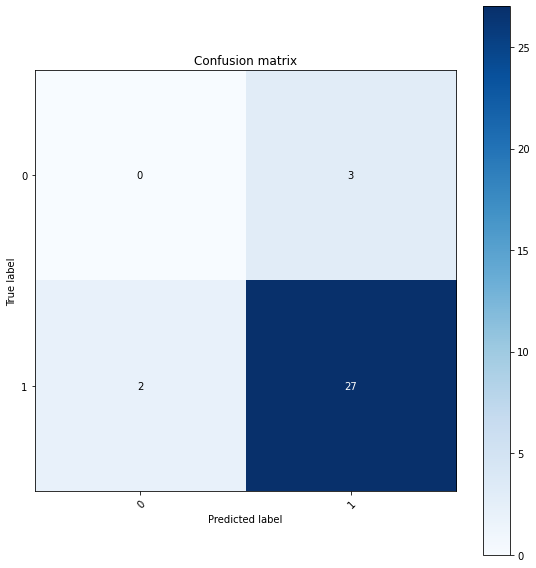

In [ ]:
y_true = validation_dis_features['Estado']
print(classification_report(y_true, y_pred_multinomial))

plot_confusion_matrix(y_true, y_pred_multinomial, normalize=False, classes=model.classes_, title='Confusion matrix')  

### Optimización de parámetros del modelo con mejor resultado: KNN

Parámetros:
* *n_neighbors*: número de vecinos
* *weights*: función de peso utilizada (uniform, distance)
* *algorithm*: algoritmo usado para calcular los vecinos cercanos (ball_tree, kd_tree, brute, auto)
* *leaf_size*: tamaño de la hoja
* *p*: parémtro de potencia para la métrica Minkowski
  * p = 1. Manhattan 
  * p = 2. Euclidea
  * p = arbitrario. Minkowski
* *metric*: metrica de distancia que se utiliza para el árbol (minkowski, euclidea, manhattan) 
* *metric_params*: adicional para la función métrica
* *n_jobs*: número de trabajos en paralelo

In [ ]:
regressor = neighbors.KNeighborsClassifier() 
regressor

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Parametrización

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
param_dist = {"n_neighbors": [1,2,4,8,16,32,56, 64, 78,100, 128], 
              "weights": ['uniform', 'distance'], 
              "algorithm": ['ball_tree', 'kd_tree', 'brute', 'auto'], 
              "leaf_size":[2,5,4,10,14],
              "p": [1,2], 
              "metric": ['minkowski']
            }

##### GridSearch

In [ ]:
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv=5)

grid_regres.fit(X = train_dis_features.drop(['Estado'], axis=1), y = train_dis_features['Estado'])

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'leaf_size': [2, 5, 4, 10, 14],
                         'metric': ['minkowski'],
                         'n_neighbors': [1, 2, 4, 8, 16, 32, 56, 64, 78, 100,
                                         128],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_regres.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=78, p=2,
                     weights='uniform')

In [ ]:
# se elige el mejor estimador
best_grid = grid_regres.best_estimator_

In [ ]:
# fit and predict
best_grid.fit( X = train_dis_features.drop(['Estado'], axis=1), y = train_dis_features['Estado'])
y_pred = best_grid.predict(validation_dis_features.drop(['Estado'],axis=1))

In [ ]:
mse = mean_squared_error(validation_dis_features['Estado'], y_pred)
print ('MSE', mse)

MSE 0.09375


In [ ]:
acc = accuracy_score(validation_dis_features['Estado'], y_pred)
print ('Acc', acc)

Acc 0.90625


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      1.00      0.95        29

    accuracy                           0.91        32
   macro avg       0.45      0.50      0.48        32
weighted avg       0.82      0.91      0.86        32

Confusion matrix, without normalization
[[ 0  3]
 [ 0 29]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


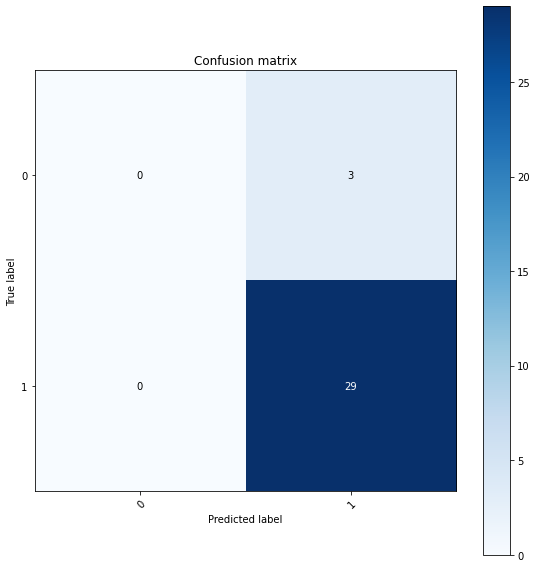

In [ ]:
y_true = validation_dis_features['Estado']
print(classification_report(y_true, y_pred))

plot_confusion_matrix(y_true, y_pred, normalize=False, classes=model.classes_, title='Confusion matrix')  

Se clasifican correctamente 29 casos y se fallan 3

##### RandomSearch

In [ ]:
rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, 
                               n_iter = 100, cv = 5, random_state=33, n_jobs = -1)

# Fit the random search model
rnd_regres.fit(X = train_dis_features.drop(['Estado'], axis=1), y = train_dis_features['Estado'])

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute', 'auto'],
                                        'leaf_size': [2, 5, 4, 10, 14],
                                        'metric': ['minkowski'],
                                        'n_neighbors': [1, 2, 4, 8, 16, 32, 56,
                                                        64, 78, 100, 128],
                               

In [ ]:
best_random = rnd_regres.best_estimator_
best_random

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=78, p=2,
                     weights='uniform')

In [ ]:
# fit and predict
best_random.fit( X = train_dis_features.drop(['Estado'], axis=1), y = train_dis_features['Estado'])
y_pred = best_random.predict(X = validation_dis_features.drop(['Estado'], axis = 1))

In [ ]:

mse = mean_squared_error(validation_dis_features['Estado'], y_pred)
print ('MSE', mse)

MSE 0.09375


In [ ]:
acc = accuracy_score(validation_dis_features['Estado'], y_pred)
print ('Acc', acc)

Acc 0.90625


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      1.00      0.95        29

    accuracy                           0.91        32
   macro avg       0.45      0.50      0.48        32
weighted avg       0.82      0.91      0.86        32

Confusion matrix, without normalization
[[ 0  3]
 [ 0 29]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


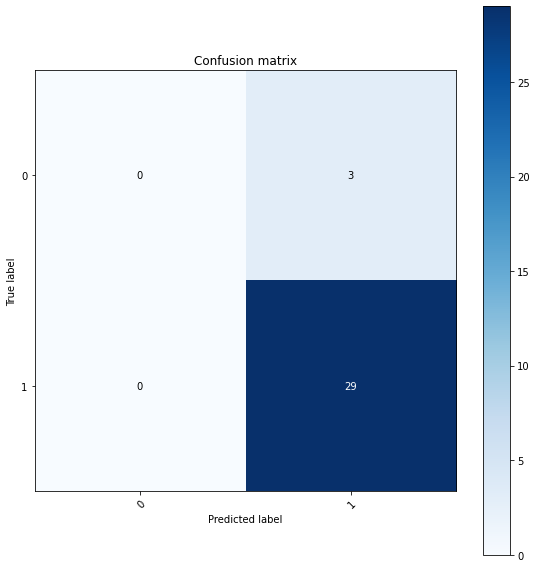

In [ ]:
y_true = validation_dis_features['Estado']
print(classification_report(y_true, y_pred))

plot_confusion_matrix(y_true, y_pred, normalize=False, classes=model.classes_, title='Confusion matrix')  

Cualquiera de las dos optimizaciones da el mismo resultado.

### Clasificación Final

In [ ]:
y_pred = best_random.predict(test_dis_features.drop(['Estado'],axis=1))

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
rmse = mean_squared_error(test_dis_features['Estado'], y_pred)
print ('RMSE', rmse)

RMSE 0.0


In [ ]:
acc = accuracy_score(test_dis_features['Estado'], y_pred)
print ('Acc', acc)

Acc 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        29

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion matrix, without normalization
[[ 1  0]
 [ 0 29]]


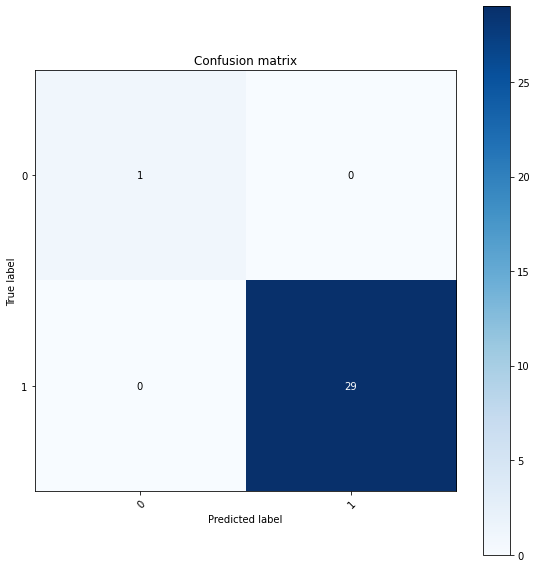

In [ ]:
y_true = test_dis_features['Estado']
print(classification_report(y_true, y_pred))

plot_confusion_matrix(y_true, y_pred, normalize=False, classes=model.classes_, title='Confusion matrix')  

In [ ]:
def evalua(x):
    if x == 0:
        return 'Suspenso'
    else:
        return 'Aprobado'

In [ ]:
test.insert(33,"Estado",test['G3'],True)

In [ ]:
test['Estado'] = test['Estado'].map(lambda x: discretiza(x))
test['Estado'] = test['Estado'].map(lambda x: evalua(x))

In [ ]:
test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Estado
382,GP,F,17,U,GT3,T,3,3,at_home,other,course,mother,1,1,0,no,yes,yes,yes,yes,yes,yes,no,4,2,5,2,5,5,2,11,12,11,Aprobado
383,GP,M,18,U,LE3,T,2,2,other,other,course,mother,1,4,0,no,yes,yes,yes,yes,yes,yes,no,4,5,5,2,4,5,0,11,11,12,Aprobado
384,GP,M,19,R,GT3,T,3,2,at_home,services,home,other,1,1,0,no,yes,no,no,no,yes,no,yes,5,3,4,2,2,5,0,11,10,10,Aprobado
385,GP,F,18,U,GT3,T,2,2,at_home,other,course,mother,4,2,0,no,no,no,yes,yes,yes,no,yes,4,2,5,1,1,2,2,10,9,10,Aprobado
386,GP,F,17,R,GT3,T,2,4,at_home,other,course,father,1,3,0,no,yes,no,no,yes,yes,yes,yes,4,4,3,1,1,5,0,15,15,15,Aprobado
387,GP,M,18,U,GT3,T,2,2,other,other,reputation,mother,1,1,0,no,no,no,no,no,yes,yes,no,5,4,2,1,2,5,6,15,14,15,Aprobado
388,GP,F,18,U,GT3,T,3,3,services,services,home,mother,1,2,0,no,no,no,yes,yes,yes,yes,no,5,3,4,1,1,4,8,10,11,12,Aprobado
389,GP,F,18,U,LE3,T,2,2,other,other,home,other,1,2,0,no,no,no,yes,no,yes,yes,yes,4,3,3,1,1,2,0,10,9,12,Aprobado
390,GP,F,18,R,GT3,T,2,2,at_home,other,course,mother,2,4,0,no,no,no,yes,yes,yes,no,no,4,4,4,1,1,4,6,14,13,14,Aprobado
391,GP,F,17,U,GT3,T,3,4,services,other,course,mother,1,3,0,no,no,no,no,yes,yes,yes,no,4,4,5,1,3,5,8,11,13,14,Aprobado


In [ ]:
output = pd.DataFrame({ 'Escuela': test['school'], 'Sexo': test['sex'], 'Edad': test['age'], 
                       'Suspensos': test['failures'],'Educación Madre': test['Medu'],
                       'Tiempo de Estudio': test['studytime'],'Intención Carrera': test['higher'],'Nota final': test['G3'],'Estado': test['Estado']})
output

,Escuela,Sexo,Edad,Suspensos,Educación Madre,Tiempo de Estudio,Intención Carrera,Nota final,Estado
382,GP,F,17,0,3,1,yes,11,Aprobado
383,GP,M,18,0,2,4,yes,12,Aprobado
384,GP,M,19,0,3,1,yes,10,Aprobado
385,GP,F,18,0,2,2,yes,10,Aprobado
386,GP,F,17,0,2,3,yes,15,Aprobado
387,GP,M,18,0,2,1,yes,15,Aprobado
388,GP,F,18,0,3,2,yes,12,Aprobado
389,GP,F,18,0,2,2,yes,12,Aprobado
390,GP,F,18,0,2,4,yes,14,Aprobado
391,GP,F,17,0,3,3,yes,14,Aprobado


In [ ]:
from google.colab import files

with open('Resultado_Clasificacion.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('Resultado_Clasificacion.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Escuela,Sexo,Edad,Suspensos,Educación Madre,Tiempo de Estudio,Intención Carrera,Nota final,Estado
382,GP,F,17,0,3,1,yes,11,Aprobado
383,GP,M,18,0,2,4,yes,12,Aprobado
384,GP,M,19,0,3,1,yes,10,Aprobado
385,GP,F,18,0,2,2,yes,10,Aprobado
386,GP,F,17,0,2,3,yes,15,Aprobado
